In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import RobustScaler, StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,  roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import ADASYN
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
from sklearn import set_config
set_config(display='diagram')
import shap
import missingno

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read file

df = pd.read_csv(r'C:\Users\aan06\OneDrive - Blue Shield of California\Documents\Custom Office Templates\2025 Machine Learning\Telecom Custom Churn\churn_dataset.csv')

df.head()

#discrete target variable churn = yes, no
# both categorical and numerical features
# seems can drop account length, phone number

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df_copy = df.copy()

Data Inspection
row/columns totals
datatype
missing 
duplicates
outlier 
class balance

In [4]:
df.shape

(3333, 21)

In [5]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


<Axes: >

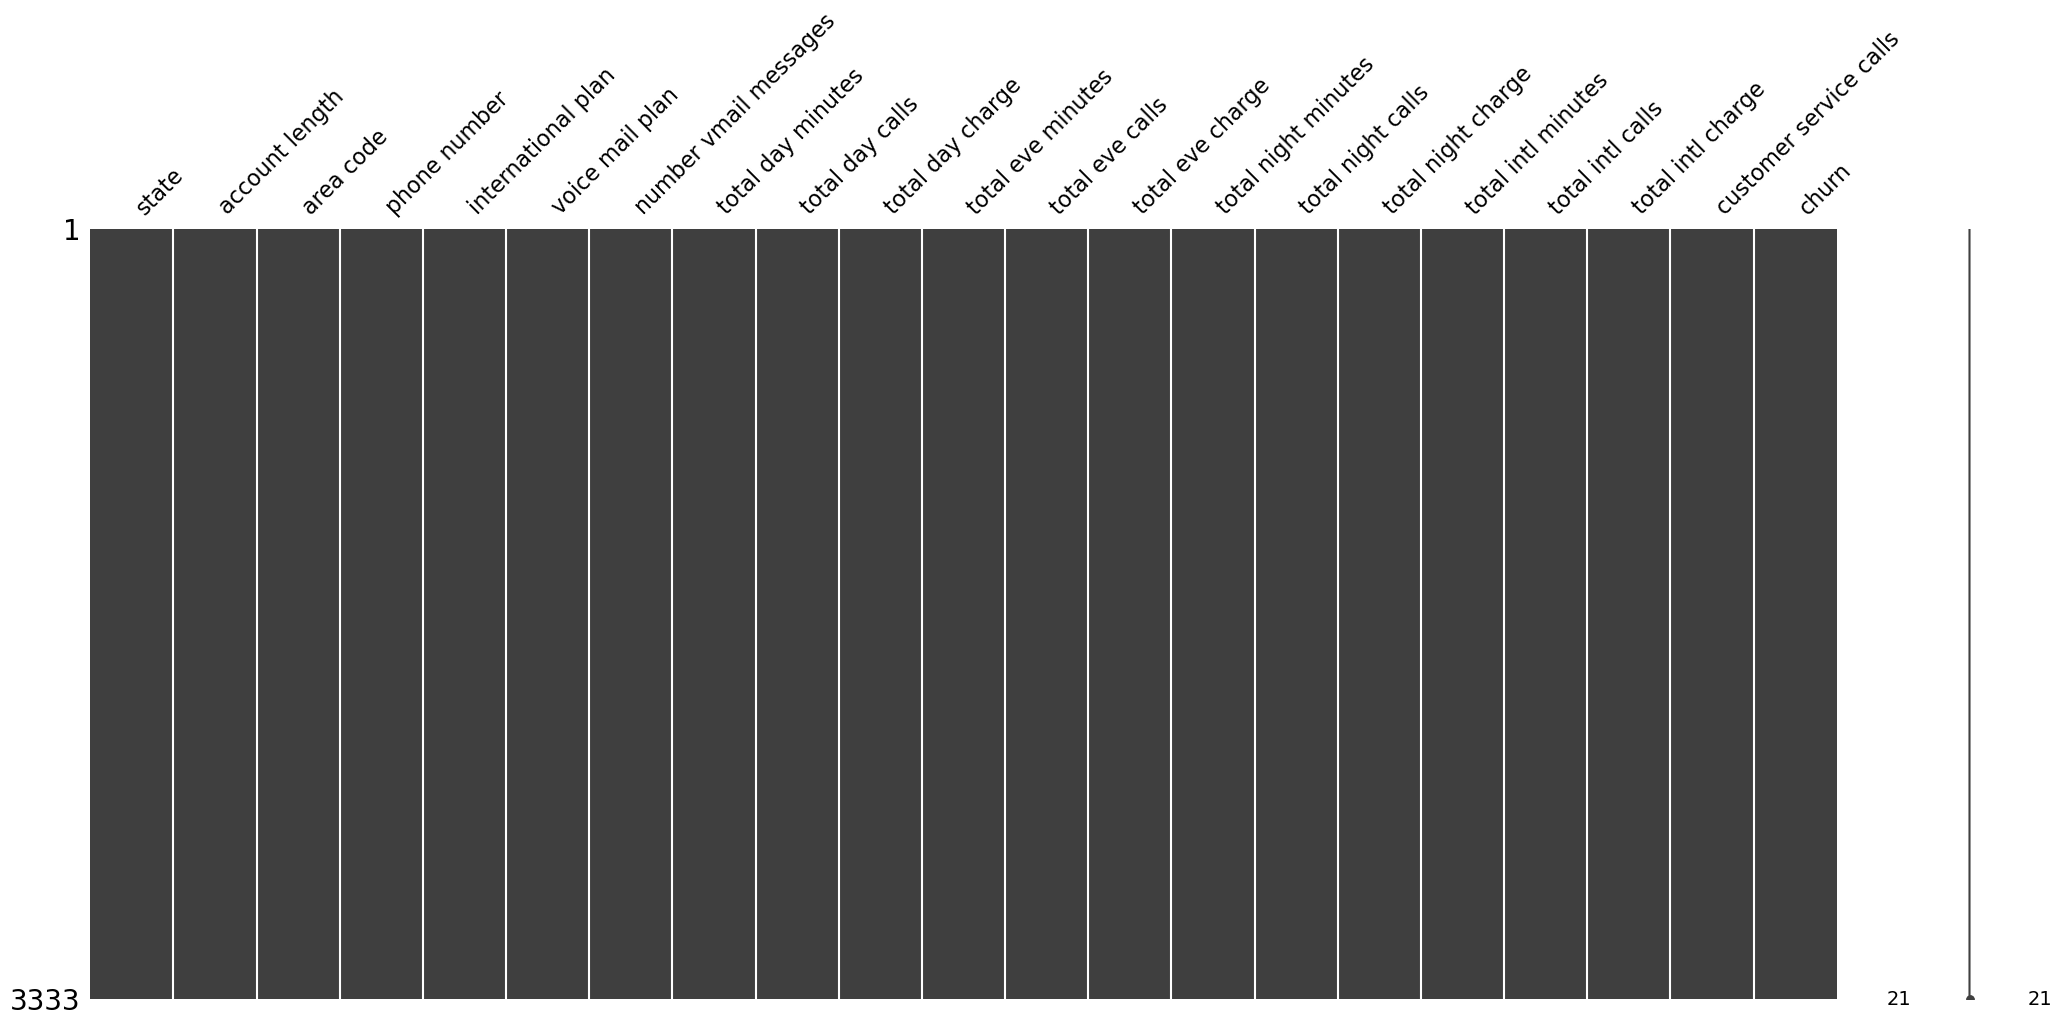

In [6]:
#check missing values
missingno.matrix(df)

# no missing values


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [8]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [9]:
#summar of numerical stats
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [10]:
#summary of categorial features

df.describe(include='object')

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,382-4657,no,no
freq,106,1,3010,2411


In [11]:
#outlier detection

for col in df.select_dtypes(include='number'):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound =Q1-1.5*IQR
    upper_bound =Q3+1.5*IQR
    #calculate outliers falls out of the lower and upper range
    outliers = df[(df[col]<lower_bound) | (df[col]>upper_bound)]
       
outliers

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,...,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
14,IA,62,415,366-9238,no,no,0,120.7,70,20.52,...,76,26.11,203.0,99,9.14,13.1,6,3.54,4,False
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,393-7984,no,no,0,62.4,89,10.61,...,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
48,ID,119,415,398-1294,no,no,0,159.1,114,27.05,...,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,OK,172,408,398-3632,no,no,0,203.9,109,34.66,...,123,19.89,160.7,65,7.23,17.8,4,4.81,4,False
3309,VT,100,408,340-9449,yes,no,0,219.4,112,37.30,...,102,19.18,255.3,95,11.49,12.0,4,3.24,4,False
3320,GA,122,510,411-5677,yes,no,0,140.0,101,23.80,...,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True
3322,MD,62,408,409-1856,no,no,0,321.1,105,54.59,...,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True


In [12]:
#class balance: churn is discrete target variable, we need to check if it is imbalanced
class_balance= df['churn'].value_counts()
print(class_balance)



churn
False    2850
True      483
Name: count, dtype: int64


In [13]:
class_balance= df['churn'].value_counts(normalize=True)
print(class_balance)
# heavily imbalanced class:85.5% customers didn't Churn while only 14.5% Churn
# need to scale after split training and test dataset


churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64


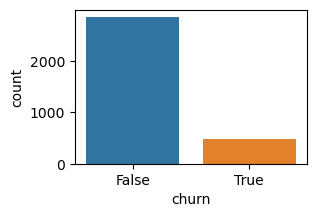

In [14]:
# seaborn countpot to check bar chart
plt.figure(figsize=(3,2))
sns.countplot(x='churn', data=df)
plt.show()

In [15]:
#churn is classification problem
#Use model evaluation criteria other than accuracy (since randomly stating no customer will churn will give us 85.5% accuracy). Metrics like precision, recall, F1-score, ROC-AUC curve will become important.

Data Preprocessing 

#drop columns
#data astype conversion


In [16]:
df['area code'] = df['area code'].astype('object')
df['area code'].dtypes

dtype('O')

In [17]:
df.describe(include='object')

# 3 area code, 415 has 1655 values. 1655/3333 almost 50% belongs to that area code

,state,area code,phone number,international plan,voice mail plan
count,3333,3333,3333,3333,3333
unique,51,3,3333,2,2
top,WV,415,382-4657,no,no
freq,106,1655,1,3010,2411


In [18]:
#drop columns: do not consider phone number could proivder any data pattern

df=df.drop(columns = ['phone number'],axis =1)

df.head(15)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


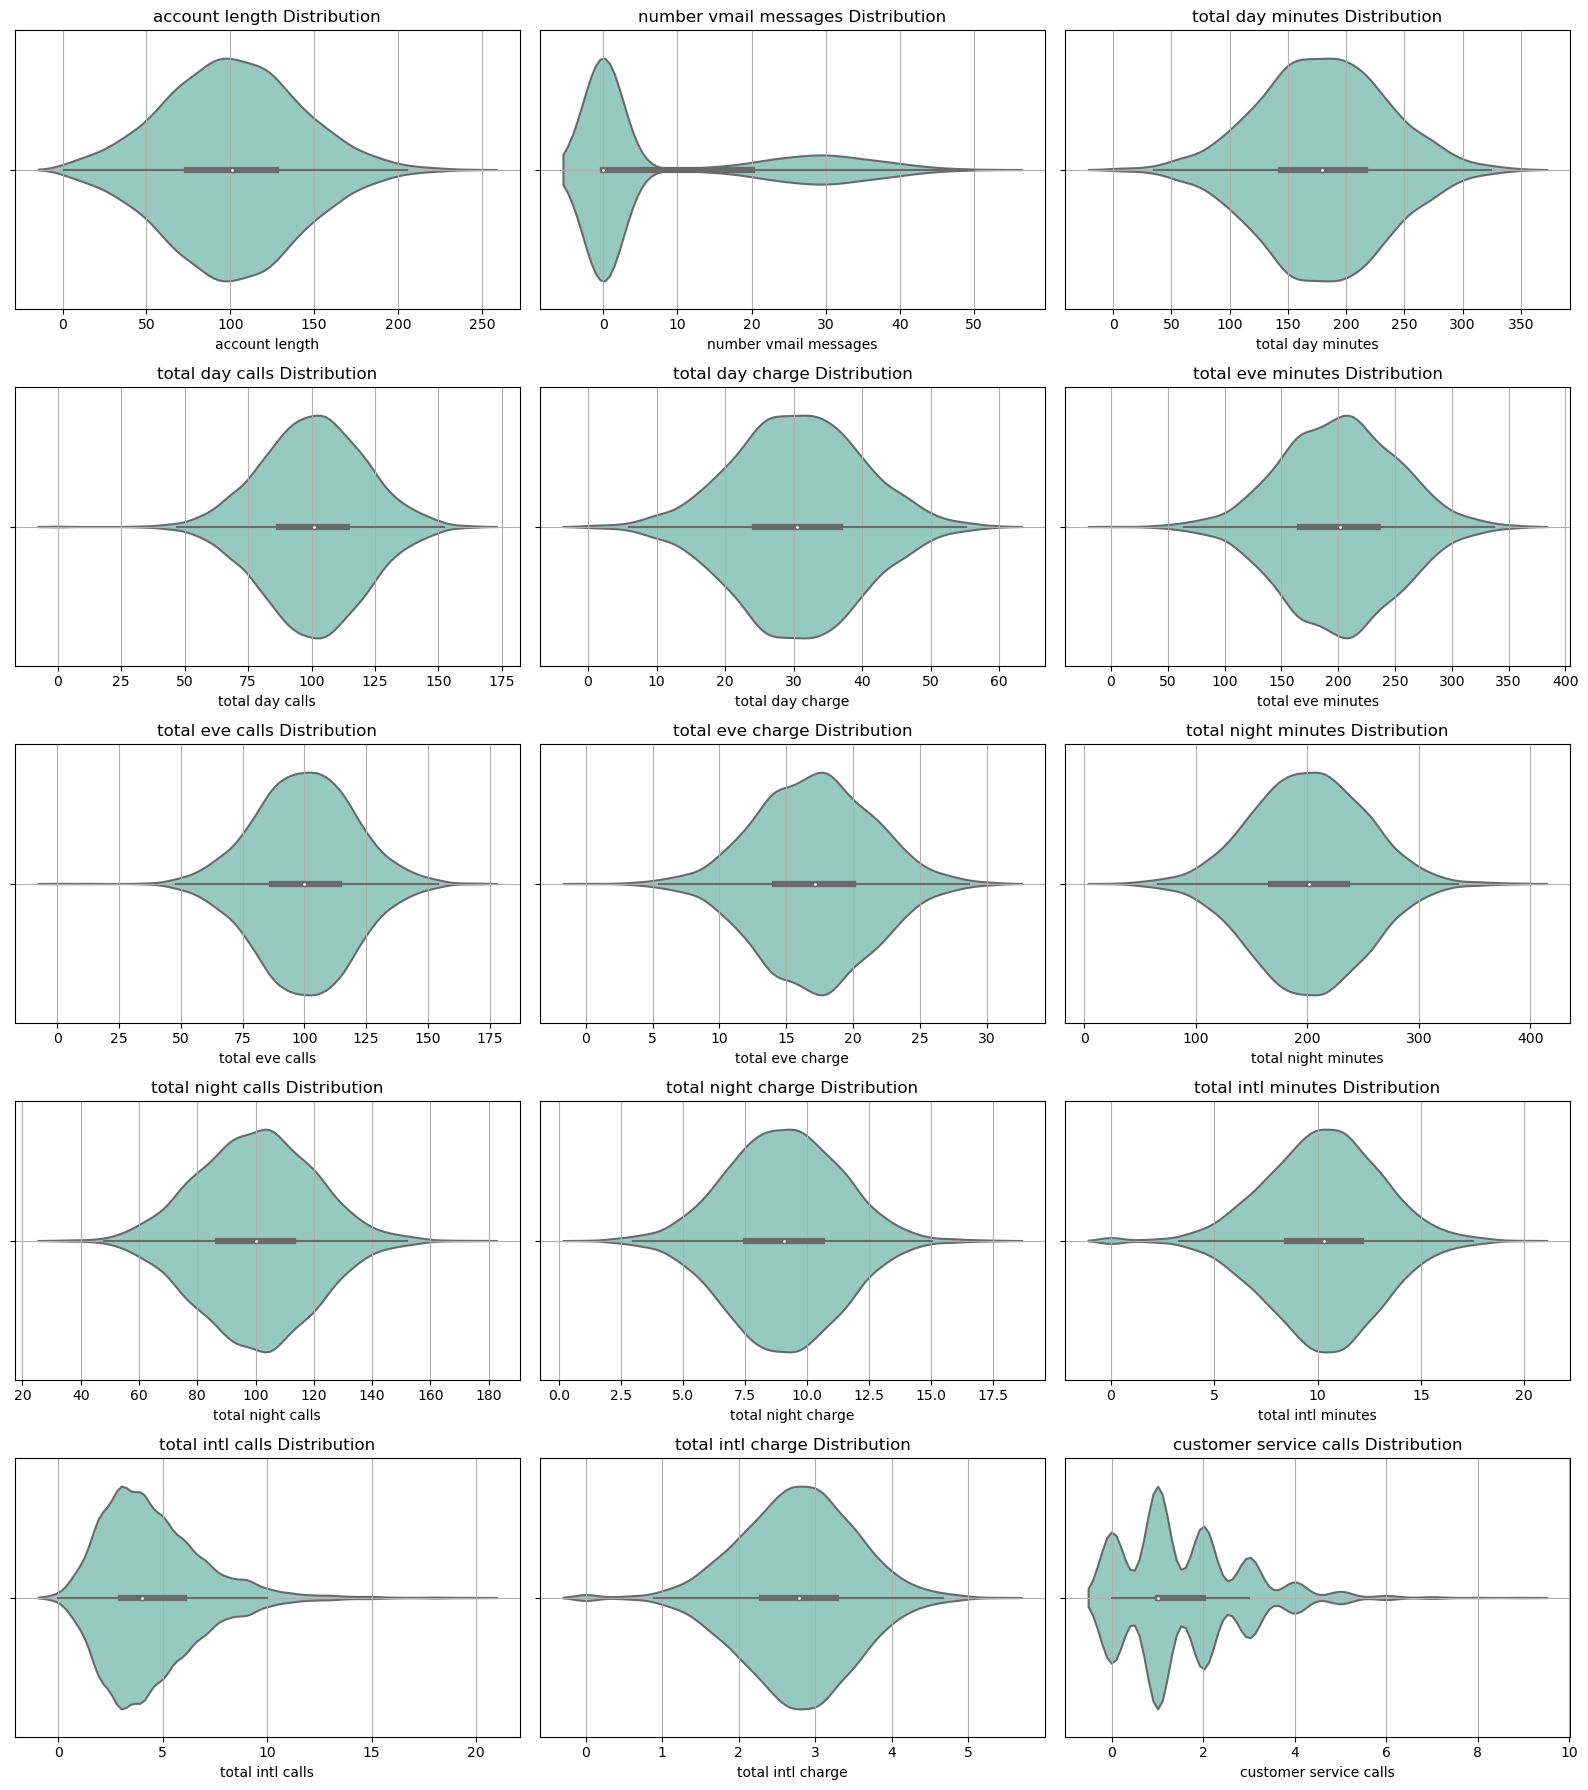

In [19]:
# EDA: Exploratory Data Analysis

# Univariate/Multivariate analysis
# coefficient
# distribution map on single numerical features all in on script


numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(len(numerical_features)//3, 3, figsize=(16, 18))
palette = sns.color_palette("Set3")
for i, col in enumerate(numerical_features):
    row, col_idx = divmod(i, 3)
    sns.violinplot(x=col, data=df, ax=axes[row, col_idx], palette=palette)
    axes[row, col_idx].set_title(f'{col} Distribution')
    axes[row, col_idx].grid(True)

if len(numerical_features) % 3 != 0:
    for j in range(len(numerical_features) % 3, 3):
        fig.delaxes(axes[-1, j])

plt.tight_layout()
plt.show()


Not normally distributed features are:
    
number vmail messages
total intl calls
customer service calls

Solution 1: leave it. but we apply tree-based models like random forest, decision tree bc LogisticRegression/SVM can also predict classification problem but they have to perfom on normal distributed featrues
    
Solution 2: Transformation/ADASYN so most of the models can be applied 

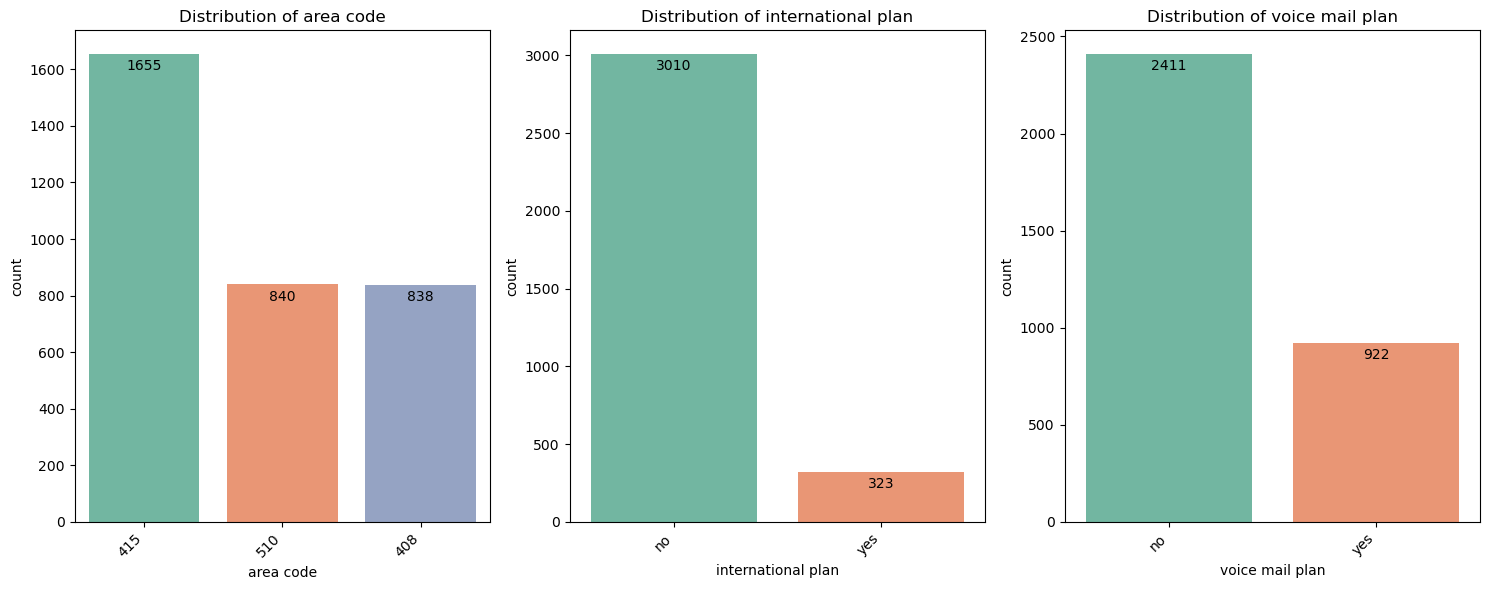

In [20]:
# Distribution on single categorical features

categorical_features = df.select_dtypes(include=['object']).columns
categorical_features = categorical_features.drop('state')

fig, axs = plt.subplots(1, 3, figsize=(15, 6))
axs = axs.flatten()
palette = sns.color_palette("Set2")
for i, feature in enumerate(categorical_features[:10]):
    plot = sns.countplot(x=df[feature], ax=axs[i], order=df[feature].value_counts().index, palette=palette)

    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, -9), textcoords = 'offset points')

    axs[i].set_title(f'Distribution of {feature}')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, horizontalalignment='right')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

international plan and voice mail plan are not normally distributed features. encoding/tranformation later

<Axes: >

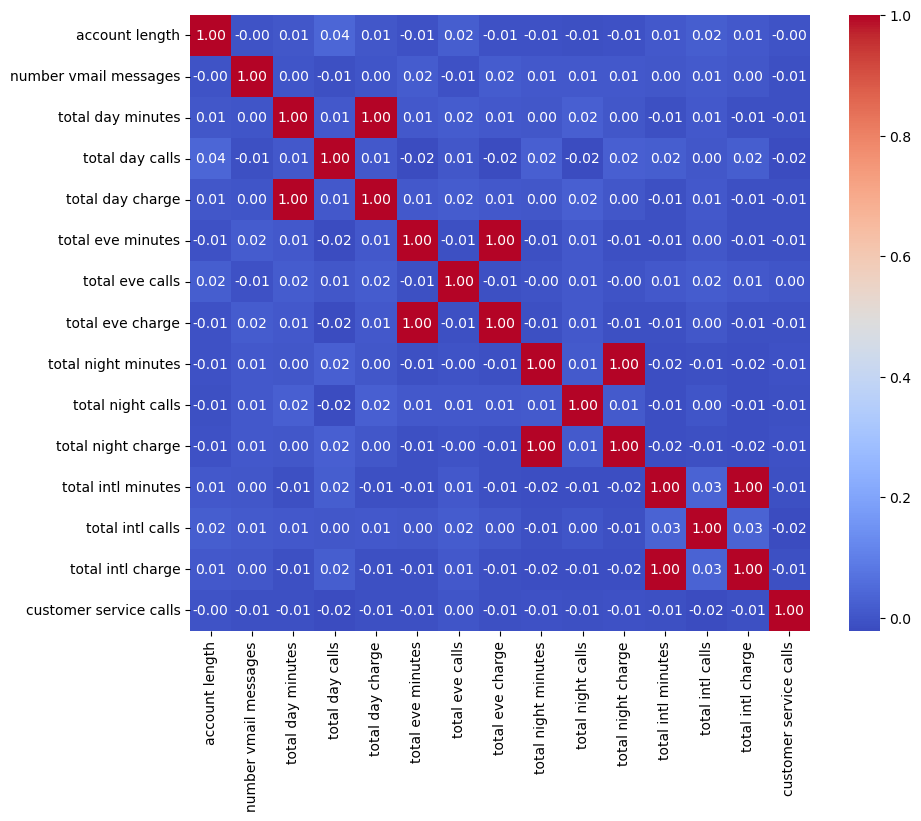

In [21]:
# SNS heatmap for correlation on numerical features
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_features].corr(), annot = True, fmt = '.2f', cmap ='coolwarm')
 

there are numerical features highly correlated:
total day minutes & total day charge (100%)
total eve minutes & total eve charge (100%)
total night minutes & total night charge (100%)
total intl minutes & total intl charge (100%)  
   
   
in Feature Selection: we need to exclude one from each pair

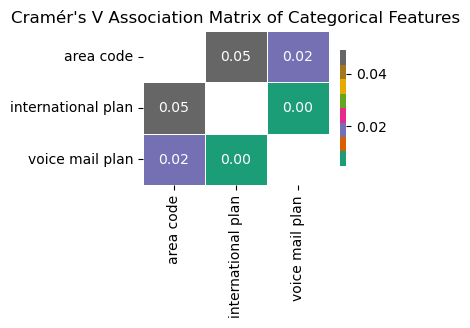

In [22]:
# Association Matrix of Categorical Features

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_features), len(categorical_features))), index=categorical_features, columns=categorical_features)

for col1 in categorical_features:
    for col2 in categorical_features:
        if col1 != col2:
            cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
        else:
            cramers_v_matrix.loc[col1, col2] = np.nan  # Set the diagonal to NaN

# Plotting the Cramér's V correlation matrix as a heatmap
plt.figure(figsize=(3, 2))
sns.heatmap(cramers_v_matrix, annot=True, cmap='Dark2', linewidths=0.5, fmt='.2f', cbar_kws={"shrink": .75})
plt.title("Cramér's V Association Matrix of Categorical Features")
plt.show()

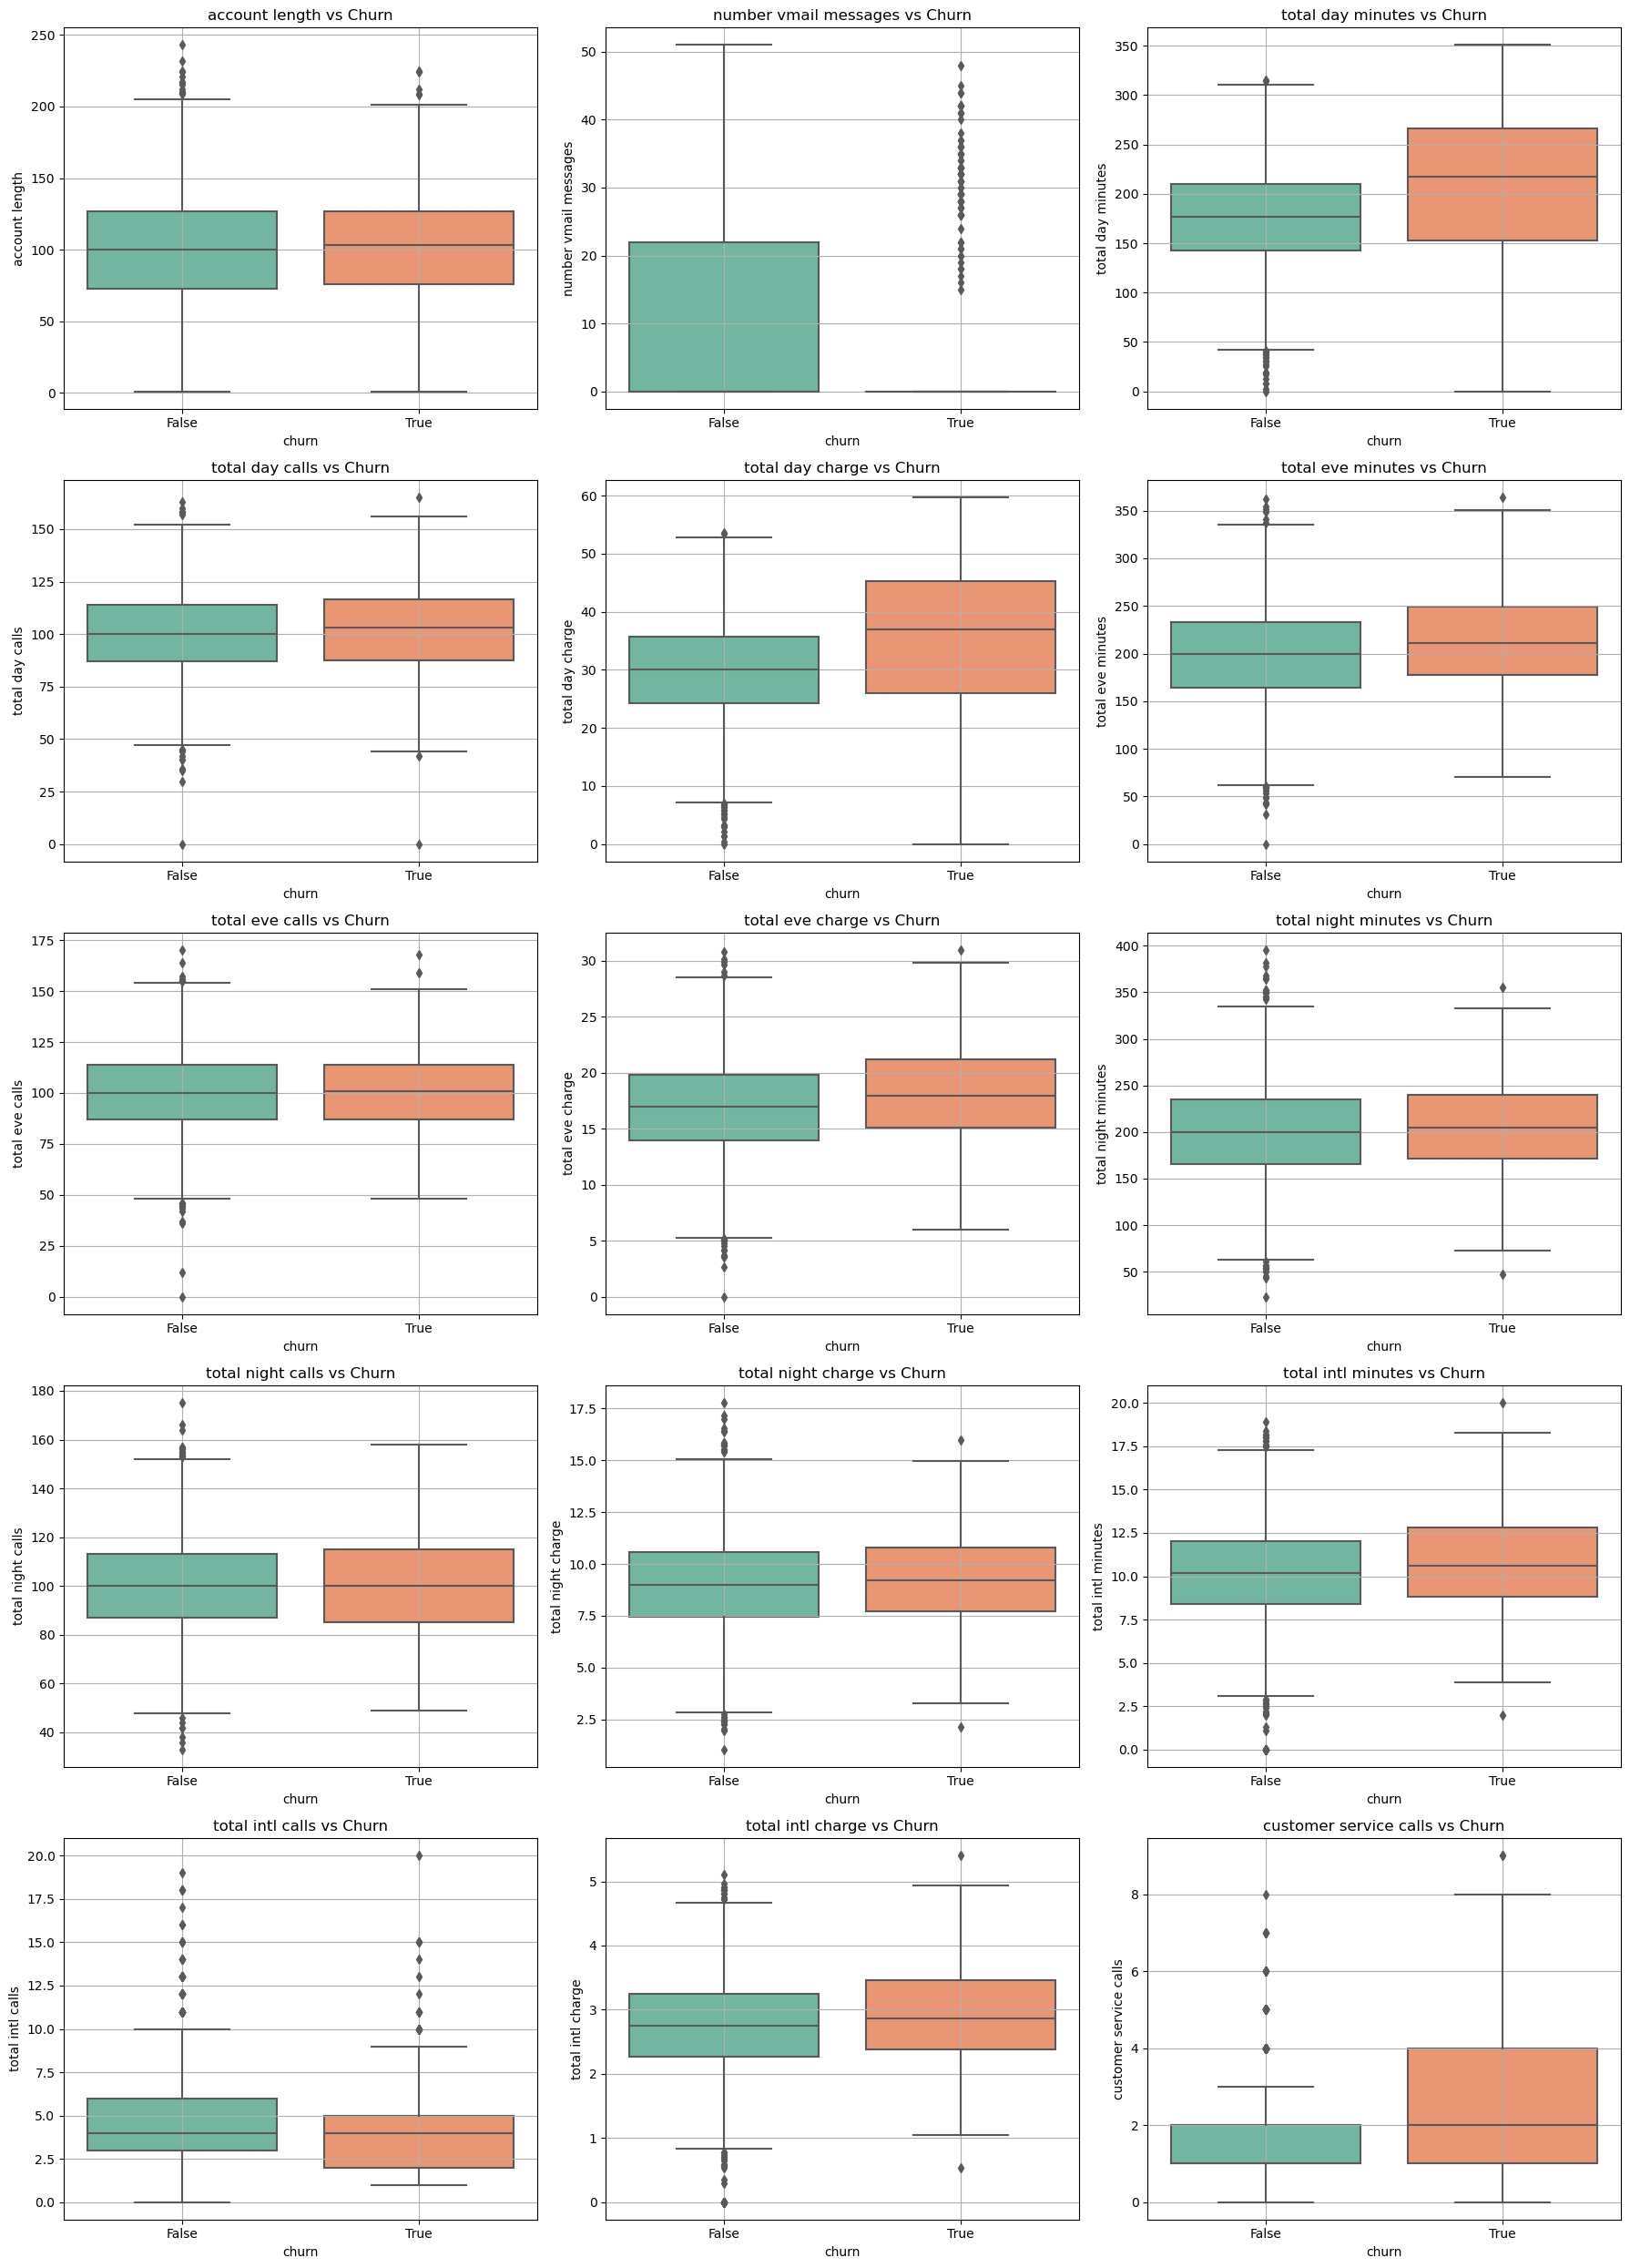

In [23]:
# now we check Correlation between each Numerical feature and Churn

plt.figure(figsize=(18, 25))
for i, col in enumerate(numerical_features):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(x='churn', y=col, data=df, palette=palette)
    plt.title(f'{col} vs Churn')
    plt.grid(True)

plt.tight_layout()
plt.show()


in numerical features, the following could be good predictors of Churn:

total day minutes
total day charge (Churned customers have very high charges)
total eve minutes
total eve charge (Churned customers have moderately high charges)
customer service calls (Churned customers have higher calls)

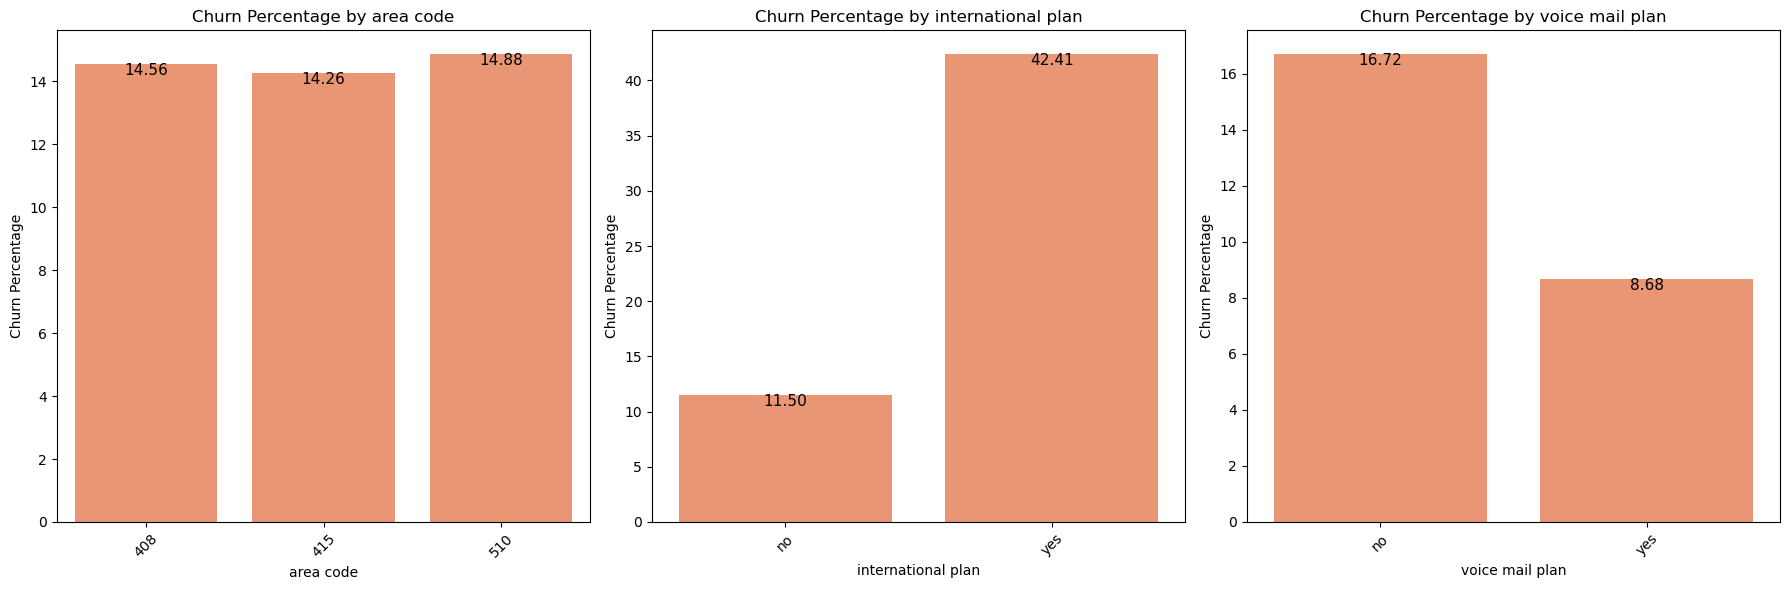

In [24]:
# categorical features & Churn
churn_col = 'churn'  # This should be the column indicating churn (True for churned, False for not churned)
plt.figure(figsize=(18, 6))

for i, col in enumerate(categorical_features):
    plt.subplot(1, 3, i + 1)

    # Calculate churn counts for each category
    churn_counts = df.groupby(col)[churn_col].value_counts(normalize=True).unstack()

    # Calculate churn percentage (percentage of True values)
    churn_counts['churn_percentage'] = churn_counts[True] * 100  # Using True instead of 1

    # Resetting index for plotting
    churn_counts = churn_counts.reset_index()

    # Plotting
    ax = sns.barplot(x=col, y='churn_percentage', data=churn_counts, color='#FC8D62')

    plt.title(f'Churn Percentage by {col}')
    plt.xlabel(col)
    plt.ylabel('Churn Percentage')
    plt.xticks(rotation=45)

    # Adding percentages below the bars
    for p in ax.patches:
        percentage = f'{p.get_height():.2f}'  # Format percentage to 2 decimal places
        ax.annotate(percentage,
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Positioning above the bar
                    ha='center', va='bottom', fontsize=11, color='black',
                    xytext=(0, -10), textcoords='offset points')  # Adjusting the vertical position

plt.tight_layout()
plt.show()
     

In categorical features, the following could be good predictors:

Having international plan (4x more churn than NOT having)
Having voice mail plan (Half churn rate compared to NOT having)

Feature Engineering

1.tranformation on non-normally numerical distributed features
2.split dataset to training and test sets
    
3.encoding categorical features: dummie coding, direct mapping, frequency encoding, target encoding: the reason why i choose to do encoding after splitting data is because we might need to use frequency encoding, target encoding (mean encoding) on target variables, we do not want data leakage so we encode after data splitting

4.scaling numercial features

number vmail messages

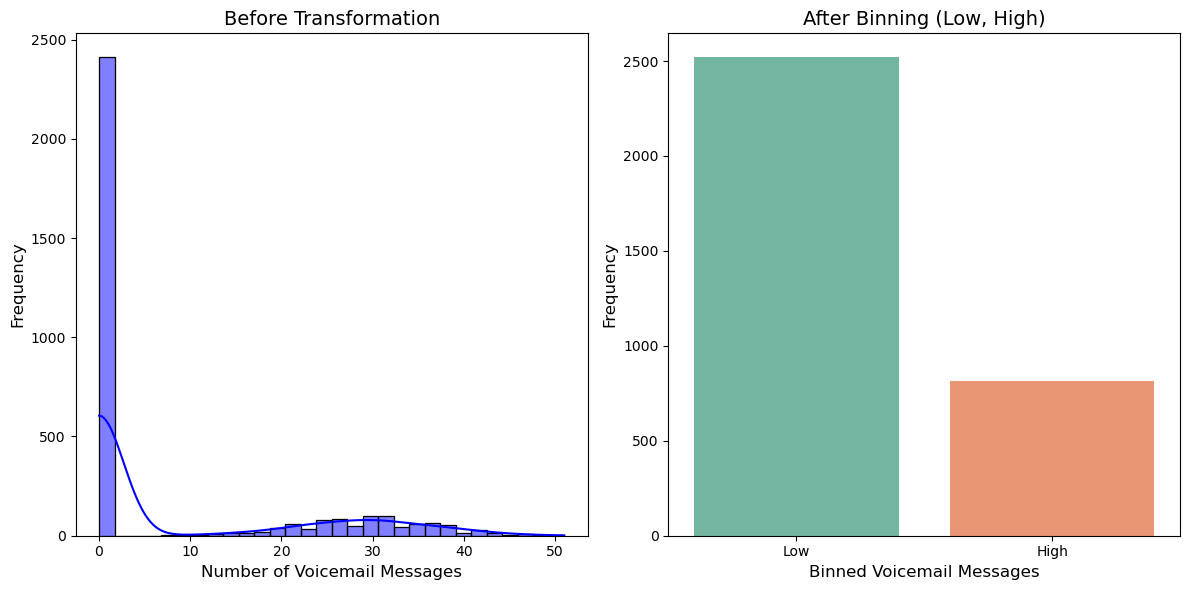

In [25]:
# apply transformation on NOT distributed features: 
#number vmail messages, total intl calls, customer service calls


# Original Distribution Ploto on Number vmail messages
# from 20-50 it looks like the normal distribution, 0-20 is not normally distributed
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['number vmail messages'], kde=True, bins=30, color='blue')
plt.title('Before Transformation', fontsize=14)
plt.xlabel('Number of Voicemail Messages', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Binning the 'number vmail messages' column into 2 bins: 0-20, 20+
bins = [0, 21, np.inf]
labels = ['Low', 'High']
# we created a new column for high, low text values only
df['binned_voicemail'] = pd.cut(df['number vmail messages'], bins=bins, labels=labels, right=False)

# Binned Distribution Plot
plt.subplot(1, 2, 2)
sns.countplot(x='binned_voicemail', data=df, palette='Set2')
plt.title('After Binning (Low, High)', fontsize=14)
plt.xlabel('Binned Voicemail Messages', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()




In [26]:
df[['number vmail messages','binned_voicemail']].sample(10)

,number vmail messages,binned_voicemail
786,0,Low
2092,0,Low
2822,0,Low
2053,0,Low
739,0,Low
574,0,Low
57,30,High
2788,0,Low
1730,0,Low
3006,0,Low


total intl calls

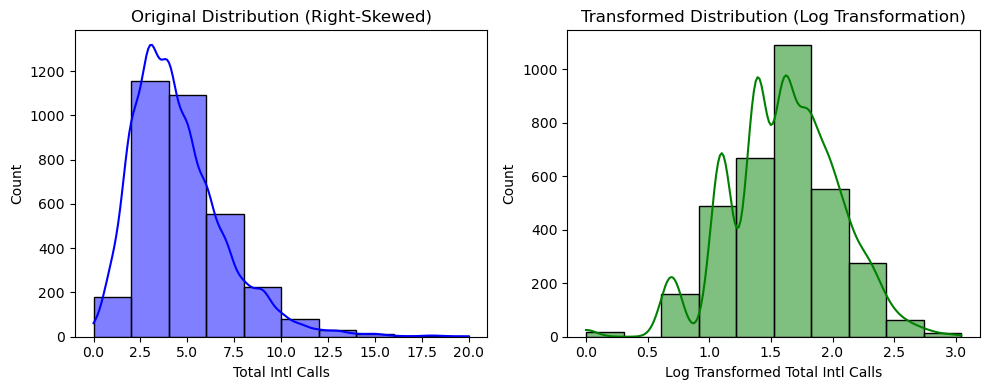

In [27]:
# Plot the original distribution (before transformation)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['total intl calls'], bins=10, kde=True, color='blue')
plt.title('Original Distribution (Right-Skewed)')
plt.xlabel('Total Intl Calls')

# Apply log transformation to reduce skewness (adding 1 to avoid log(0))
df['total_intl_calls_log'] = np.log1p(df['total intl calls'])

# Plot the transformed distribution (after log transformation)
plt.subplot(1, 2, 2)
sns.histplot(df['total_intl_calls_log'], bins=10, kde=True, color='green')
plt.title('Transformed Distribution (Log Transformation)')
plt.xlabel('Log Transformed Total Intl Calls')

plt.tight_layout()
plt.show()

In [28]:
df[['total intl calls','total_intl_calls_log']].sample(10)

,total intl calls,total_intl_calls_log
99,7,2.079442
473,4,1.609438
709,3,1.386294
204,4,1.609438
1477,5,1.791759
3091,3,1.386294
860,6,1.945910
1466,3,1.386294
1095,3,1.386294
1220,5,1.791759


customer service calls

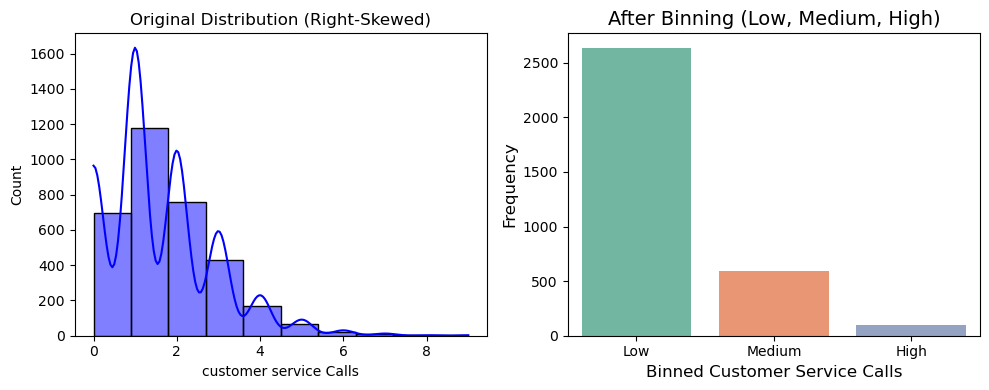

In [29]:
# Plot the original distribution (before transformation)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['customer service calls'], bins=10, kde=True, color='blue')
plt.title('Original Distribution (Right-Skewed)')
plt.xlabel('customer service Calls')

# Binning the 'customer service calls' column into 3 bins: 0-2, 3-4, 4+
bins = [0, 3, 5, np.inf]
labels = ['Low', 'Medium', 'High']
df['binned_customer_service_calls'] = pd.cut(df['customer service calls'], bins=bins, labels=labels, right=False)

# Binned Distribution Plot
plt.subplot(1, 2, 2)
sns.countplot(x='binned_customer_service_calls', data=df, palette='Set2')
plt.title('After Binning (Low, Medium, High)', fontsize=14)
plt.xlabel('Binned Customer Service Calls', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

In [30]:
df[['customer service calls','binned_customer_service_calls']].sample(10)

,customer service calls,binned_customer_service_calls
817,2,Low
1964,1,Low
720,0,Low
1279,2,Low
2403,2,Low
1167,1,Low
1531,4,Medium
630,0,Low
1886,3,Medium
2383,2,Low


completed tranformation steps for 3 numerical categories
since we created three new columns, we will drop the 3 original numerical features


In [31]:
df=df.drop(columns=['number vmail messages', 'total intl calls',
                 'customer service calls'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   state                          3333 non-null   object  
 1   account length                 3333 non-null   int64   
 2   area code                      3333 non-null   object  
 3   international plan             3333 non-null   object  
 4   voice mail plan                3333 non-null   object  
 5   total day minutes              3333 non-null   float64 
 6   total day calls                3333 non-null   int64   
 7   total day charge               3333 non-null   float64 
 8   total eve minutes              3333 non-null   float64 
 9   total eve calls                3333 non-null   int64   
 10  total eve charge               3333 non-null   float64 
 11  total night minutes            3333 non-null   float64 
 12  total night calls              333

back to the highly correlated numerical features found from heatmap, we create new columns calc from them

there are numerical features highly correlated: 
total day minutes & total day charge (100%)
total eve minutes & total eve charge (100%)
total night minutes & total night charge (100%)
total intl minutes & total intl charge (100%)  
   

In [32]:

df['total_day_charge_per_minute'] = df['total day charge'] / df['total day minutes']
df['total_eve_charge_per_minute'] = df['total eve charge'] / df['total eve minutes']
df['total_night_charge_per_minute'] = df['total night charge'] / df['total night minutes']
df['total_intl_charge_per_minute'] = df['total intl charge'] / df['total intl minutes']
df.head()

,state,account length,area code,international plan,voice mail plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total intl minutes,total intl charge,churn,binned_voicemail,total_intl_calls_log,binned_customer_service_calls,total_day_charge_per_minute,total_eve_charge_per_minute,total_night_charge_per_minute,total_intl_charge_per_minute
0,KS,128,415,no,yes,265.1,110,45.07,197.4,99,...,10.0,2.70,False,High,1.386294,Low,0.170011,0.085005,0.044994,0.270000
1,OH,107,415,no,yes,161.6,123,27.47,195.5,103,...,13.7,3.70,False,High,1.386294,Low,0.169988,0.085013,0.045008,0.270073
2,NJ,137,415,no,no,243.4,114,41.38,121.2,110,...,12.2,3.29,False,Low,1.791759,Low,0.170008,0.084983,0.045018,0.269672
3,OH,84,408,yes,no,299.4,71,50.90,61.9,88,...,6.6,1.78,False,Low,2.079442,Low,0.170007,0.084976,0.044997,0.269697
4,OK,75,415,yes,no,166.7,113,28.34,148.3,122,...,10.1,2.73,False,Low,1.386294,Medium,0.170006,0.085030,0.044997,0.270297


Encoding Categorical Features


Direct Mapping

In [33]:
# Direct Mapping

df.dtypes

state                              object
account length                      int64
area code                          object
international plan                 object
voice mail plan                    object
total day minutes                 float64
total day calls                     int64
total day charge                  float64
total eve minutes                 float64
total eve calls                     int64
total eve charge                  float64
total night minutes               float64
total night calls                   int64
total night charge                float64
total intl minutes                float64
total intl charge                 float64
churn                                bool
binned_voicemail                 category
total_intl_calls_log              float64
binned_customer_service_calls    category
total_day_charge_per_minute       float64
total_eve_charge_per_minute       float64
total_night_charge_per_minute     float64
total_intl_charge_per_minute      

In [34]:
df.select_dtypes(include=['object','category']).columns

Index(['state', 'area code', 'international plan', 'voice mail plan',
       'binned_voicemail', 'binned_customer_service_calls'],
      dtype='object')

In [35]:
df.head()

,state,account length,area code,international plan,voice mail plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total intl minutes,total intl charge,churn,binned_voicemail,total_intl_calls_log,binned_customer_service_calls,total_day_charge_per_minute,total_eve_charge_per_minute,total_night_charge_per_minute,total_intl_charge_per_minute
0,KS,128,415,no,yes,265.1,110,45.07,197.4,99,...,10.0,2.70,False,High,1.386294,Low,0.170011,0.085005,0.044994,0.270000
1,OH,107,415,no,yes,161.6,123,27.47,195.5,103,...,13.7,3.70,False,High,1.386294,Low,0.169988,0.085013,0.045008,0.270073
2,NJ,137,415,no,no,243.4,114,41.38,121.2,110,...,12.2,3.29,False,Low,1.791759,Low,0.170008,0.084983,0.045018,0.269672
3,OH,84,408,yes,no,299.4,71,50.90,61.9,88,...,6.6,1.78,False,Low,2.079442,Low,0.170007,0.084976,0.044997,0.269697
4,OK,75,415,yes,no,166.7,113,28.34,148.3,122,...,10.1,2.73,False,Low,1.386294,Medium,0.170006,0.085030,0.044997,0.270297


In [36]:
# Train_Test_split data
# define features X and target y

X = df.drop(columns=['churn'], axis = 1)
y = df['churn']

In [37]:
X.head()

,state,account length,area code,international plan,voice mail plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night charge,total intl minutes,total intl charge,binned_voicemail,total_intl_calls_log,binned_customer_service_calls,total_day_charge_per_minute,total_eve_charge_per_minute,total_night_charge_per_minute,total_intl_charge_per_minute
0,KS,128,415,no,yes,265.1,110,45.07,197.4,99,...,11.01,10.0,2.70,High,1.386294,Low,0.170011,0.085005,0.044994,0.270000
1,OH,107,415,no,yes,161.6,123,27.47,195.5,103,...,11.45,13.7,3.70,High,1.386294,Low,0.169988,0.085013,0.045008,0.270073
2,NJ,137,415,no,no,243.4,114,41.38,121.2,110,...,7.32,12.2,3.29,Low,1.791759,Low,0.170008,0.084983,0.045018,0.269672
3,OH,84,408,yes,no,299.4,71,50.90,61.9,88,...,8.86,6.6,1.78,Low,2.079442,Low,0.170007,0.084976,0.044997,0.269697
4,OK,75,415,yes,no,166.7,113,28.34,148.3,122,...,8.41,10.1,2.73,Low,1.386294,Medium,0.170006,0.085030,0.044997,0.270297


In [38]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: churn, dtype: bool

In [39]:
# Step 2: Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Display the shapes of the resulting sets
print("Training set size: ", X_train.shape)
print("Test set size: ", X_test.shape)

Training set size:  (2666, 23)
Test set size:  (667, 23)


Encoding Categorial Features: why do it after data spliting. Will use frequency encoding/Target Encoding involved with target variables
do not want to have data leakage

In [40]:

df.select_dtypes(include=['object','category']).columns

Index(['state', 'area code', 'international plan', 'voice mail plan',
       'binned_voicemail', 'binned_customer_service_calls'],
      dtype='object')

In [41]:
# now only Y sets have churn, encode to 1,0
y_train = y_train.replace({True:1, False:0})
y_test  = y_test.replace({True:1, False:0})


In [42]:
y_train.head()

3286    0
86      1
1349    0
1649    0
3000    0
Name: churn, dtype: int64

In [43]:
X_train.head()

,state,account length,area code,international plan,voice mail plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night charge,total intl minutes,total intl charge,binned_voicemail,total_intl_calls_log,binned_customer_service_calls,total_day_charge_per_minute,total_eve_charge_per_minute,total_night_charge_per_minute,total_intl_charge_per_minute
3286,OH,106,415,no,yes,220.1,105,37.42,222.2,109,...,7.13,13.1,3.54,High,2.197225,Low,0.170014,0.085014,0.045013,0.270229
86,IN,94,408,no,no,157.9,105,26.84,155.0,101,...,8.53,8.0,2.16,Low,1.791759,Medium,0.169981,0.085032,0.044989,0.270000
1349,KY,71,510,no,yes,141.4,107,24.04,163.0,105,...,9.90,5.6,1.51,High,1.386294,Low,0.170014,0.085031,0.045000,0.269643
1649,NH,130,408,no,no,68.4,86,11.63,193.3,110,...,7.72,10.4,2.81,Low,1.609438,Low,0.170029,0.084997,0.045015,0.270192
3000,NJ,87,510,no,no,223.2,109,37.94,127.5,86,...,13.02,14.5,3.92,Low,1.609438,Medium,0.169982,0.085020,0.045005,0.270345


In [44]:
X_test.head()

,state,account length,area code,international plan,voice mail plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night charge,total intl minutes,total intl charge,binned_voicemail,total_intl_calls_log,binned_customer_service_calls,total_day_charge_per_minute,total_eve_charge_per_minute,total_night_charge_per_minute,total_intl_charge_per_minute
601,MA,62,415,yes,no,159.7,86,27.15,197.5,76,...,5.47,13.9,3.75,Low,1.945910,Low,0.170006,0.085013,0.044984,0.269784
2050,MT,121,408,no,no,213.2,79,36.24,120.7,116,...,11.00,7.5,2.03,Low,1.609438,Low,0.169981,0.085004,0.045008,0.270667
3200,CT,100,510,yes,no,107.2,98,18.22,86.8,122,...,7.03,9.7,2.62,Low,1.609438,Low,0.169963,0.085023,0.045006,0.270103
1953,WA,137,408,no,no,208.8,120,35.50,225.3,100,...,9.97,11.1,3.00,Low,1.791759,Low,0.170019,0.084998,0.044991,0.270270
1119,OK,189,415,no,no,208.3,106,35.41,236.7,123,...,8.06,11.3,3.05,Low,1.791759,Medium,0.169995,0.085002,0.045003,0.269912


In [45]:
X_train.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl charge',
       'binned_voicemail', 'total_intl_calls_log',
       'binned_customer_service_calls', 'total_day_charge_per_minute',
       'total_eve_charge_per_minute', 'total_night_charge_per_minute',
       'total_intl_charge_per_minute'],
      dtype='object')

In [46]:
X_train['international plan'] = X_train['international plan'].replace({'yes':1,'no':0})

In [47]:
X_test['international plan'] = X_test['international plan'].replace({'yes':1,'no':0})

In [48]:
X_test.head()

,state,account length,area code,international plan,voice mail plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night charge,total intl minutes,total intl charge,binned_voicemail,total_intl_calls_log,binned_customer_service_calls,total_day_charge_per_minute,total_eve_charge_per_minute,total_night_charge_per_minute,total_intl_charge_per_minute
601,MA,62,415,1,no,159.7,86,27.15,197.5,76,...,5.47,13.9,3.75,Low,1.945910,Low,0.170006,0.085013,0.044984,0.269784
2050,MT,121,408,0,no,213.2,79,36.24,120.7,116,...,11.00,7.5,2.03,Low,1.609438,Low,0.169981,0.085004,0.045008,0.270667
3200,CT,100,510,1,no,107.2,98,18.22,86.8,122,...,7.03,9.7,2.62,Low,1.609438,Low,0.169963,0.085023,0.045006,0.270103
1953,WA,137,408,0,no,208.8,120,35.50,225.3,100,...,9.97,11.1,3.00,Low,1.791759,Low,0.170019,0.084998,0.044991,0.270270
1119,OK,189,415,0,no,208.3,106,35.41,236.7,123,...,8.06,11.3,3.05,Low,1.791759,Medium,0.169995,0.085002,0.045003,0.269912


In [49]:

#voice mail plan


X_train['voice mail plan'] = X_train['voice mail plan'].replace({'no': 0, 'yes': 1})
X_test['voice mail plan'] = X_test['voice mail plan'].replace({'no': 0, 'yes': 1})

     

In [50]:
X_train.head()

,state,account length,area code,international plan,voice mail plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night charge,total intl minutes,total intl charge,binned_voicemail,total_intl_calls_log,binned_customer_service_calls,total_day_charge_per_minute,total_eve_charge_per_minute,total_night_charge_per_minute,total_intl_charge_per_minute
3286,OH,106,415,0,1,220.1,105,37.42,222.2,109,...,7.13,13.1,3.54,High,2.197225,Low,0.170014,0.085014,0.045013,0.270229
86,IN,94,408,0,0,157.9,105,26.84,155.0,101,...,8.53,8.0,2.16,Low,1.791759,Medium,0.169981,0.085032,0.044989,0.270000
1349,KY,71,510,0,1,141.4,107,24.04,163.0,105,...,9.90,5.6,1.51,High,1.386294,Low,0.170014,0.085031,0.045000,0.269643
1649,NH,130,408,0,0,68.4,86,11.63,193.3,110,...,7.72,10.4,2.81,Low,1.609438,Low,0.170029,0.084997,0.045015,0.270192
3000,NJ,87,510,0,0,223.2,109,37.94,127.5,86,...,13.02,14.5,3.92,Low,1.609438,Medium,0.169982,0.085020,0.045005,0.270345


In [51]:
X_test.head()

,state,account length,area code,international plan,voice mail plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night charge,total intl minutes,total intl charge,binned_voicemail,total_intl_calls_log,binned_customer_service_calls,total_day_charge_per_minute,total_eve_charge_per_minute,total_night_charge_per_minute,total_intl_charge_per_minute
601,MA,62,415,1,0,159.7,86,27.15,197.5,76,...,5.47,13.9,3.75,Low,1.945910,Low,0.170006,0.085013,0.044984,0.269784
2050,MT,121,408,0,0,213.2,79,36.24,120.7,116,...,11.00,7.5,2.03,Low,1.609438,Low,0.169981,0.085004,0.045008,0.270667
3200,CT,100,510,1,0,107.2,98,18.22,86.8,122,...,7.03,9.7,2.62,Low,1.609438,Low,0.169963,0.085023,0.045006,0.270103
1953,WA,137,408,0,0,208.8,120,35.50,225.3,100,...,9.97,11.1,3.00,Low,1.791759,Low,0.170019,0.084998,0.044991,0.270270
1119,OK,189,415,0,0,208.3,106,35.41,236.7,123,...,8.06,11.3,3.05,Low,1.791759,Medium,0.169995,0.085002,0.045003,0.269912


Frequency Encoding

In [52]:
# area code

# first, check the correlation between area code and churn rate by union both X train and y train bc y train has the churn rate(target)

pd.concat([X_train['area code'], y_train], axis=1).groupby('area code').agg(churn_rate=('churn', 'mean'))



,churn_rate
area code,
408,0.136095
415,0.148204
510,0.146789


Area code does not have any direct correlation with churn rate. as they all takes up 13%, 14%. i think no need to use target encoding(mean)

In [53]:

X_train['area code'].value_counts(normalize=True).reset_index()

,area code,proportion
0,415,0.501125
1,408,0.253563
2,510,0.245311


415 apprears 50%, 408/510 appreas 25%. will apply frequency encoding

In [54]:
# Step 1: calc frequency encoding based on training set

freq_encoding_area_code = X_train['area code'].value_counts(normalize=True)

     
freq_encoding_area_code


area code
415    0.501125
408    0.253563
510    0.245311
Name: proportion, dtype: float64

In [55]:
# Step 2: Map the frequencies back to the training and test sets

X_train['area code'] = X_train['area code'].replace(freq_encoding_area_code)
X_test['area code'] = X_test['area code'].replace(freq_encoding_area_code)
X_train.head()


,state,account length,area code,international plan,voice mail plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night charge,total intl minutes,total intl charge,binned_voicemail,total_intl_calls_log,binned_customer_service_calls,total_day_charge_per_minute,total_eve_charge_per_minute,total_night_charge_per_minute,total_intl_charge_per_minute
3286,OH,106,0.501125,0,1,220.1,105,37.42,222.2,109,...,7.13,13.1,3.54,High,2.197225,Low,0.170014,0.085014,0.045013,0.270229
86,IN,94,0.253563,0,0,157.9,105,26.84,155.0,101,...,8.53,8.0,2.16,Low,1.791759,Medium,0.169981,0.085032,0.044989,0.270000
1349,KY,71,0.245311,0,1,141.4,107,24.04,163.0,105,...,9.90,5.6,1.51,High,1.386294,Low,0.170014,0.085031,0.045000,0.269643
1649,NH,130,0.253563,0,0,68.4,86,11.63,193.3,110,...,7.72,10.4,2.81,Low,1.609438,Low,0.170029,0.084997,0.045015,0.270192
3000,NJ,87,0.245311,0,0,223.2,109,37.94,127.5,86,...,13.02,14.5,3.92,Low,1.609438,Medium,0.169982,0.085020,0.045005,0.270345


In [56]:
# check state
# first check correlation with churn rate

pd.concat([X_train['state'], y_train], axis=1).groupby('state').agg(churn_rate=('churn','mean')).sort_values(by='churn_rate',ascending=False)

,churn_rate
state,
CA,0.285714
MD,0.267857
NJ,0.264151
SC,0.260870
MI,0.228070
WA,0.224490
NV,0.218182
MS,0.215686
MT,0.214286


state has direct correlation with churn rate. will apply Target Encoding(mean encoding)

In [57]:
# Step 1: Calculate frequency encoding based on the training set
target_encoding_state = pd.concat([X_train['state'], y_train], axis=1).groupby('state').agg(churn_rate=('churn', 'mean'))

# Step 2: Map the frequencies back to the training and test sets
X_train['state'] = X_train['state'].replace(target_encoding_state['churn_rate'])
X_test['state'] = X_test['state'].replace(target_encoding_state['churn_rate'])
X_train.head()

,state,account length,area code,international plan,voice mail plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night charge,total intl minutes,total intl charge,binned_voicemail,total_intl_calls_log,binned_customer_service_calls,total_day_charge_per_minute,total_eve_charge_per_minute,total_night_charge_per_minute,total_intl_charge_per_minute
3286,0.152542,106,0.501125,0,1,220.1,105,37.42,222.2,109,...,7.13,13.1,3.54,High,2.197225,Low,0.170014,0.085014,0.045013,0.270229
86,0.160714,94,0.253563,0,0,157.9,105,26.84,155.0,101,...,8.53,8.0,2.16,Low,1.791759,Medium,0.169981,0.085032,0.044989,0.270000
1349,0.122449,71,0.245311,0,1,141.4,107,24.04,163.0,105,...,9.90,5.6,1.51,High,1.386294,Low,0.170014,0.085031,0.045000,0.269643
1649,0.127660,130,0.253563,0,0,68.4,86,11.63,193.3,110,...,7.72,10.4,2.81,Low,1.609438,Low,0.170029,0.084997,0.045015,0.270192
3000,0.264151,87,0.245311,0,0,223.2,109,37.94,127.5,86,...,13.02,14.5,3.92,Low,1.609438,Medium,0.169982,0.085020,0.045005,0.270345


In [58]:
#  binned_voicemail

pd.concat([X_train['binned_voicemail'], y_train], axis=1).groupby('binned_voicemail').agg(churn_rate=('churn', 'mean'))
     

,churn_rate
binned_voicemail,
Low,0.163205
High,0.086957


In [59]:
# map target encoding to binned voicemail

target_encoding_binned_voicemail = pd.concat([X_train['binned_voicemail'], y_train], axis=1).groupby('binned_voicemail').agg(churn_rate=('churn', 'mean'))


# Step 2: Map the churn rate back to the training and test sets

X_train['binned_voicemail'] = X_train['binned_voicemail'].replace(target_encoding_binned_voicemail['churn_rate']).astype(float)
X_test['binned_voicemail'] = X_test['binned_voicemail'].replace(target_encoding_binned_voicemail['churn_rate']).astype(float)
X_train.head()

,state,account length,area code,international plan,voice mail plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night charge,total intl minutes,total intl charge,binned_voicemail,total_intl_calls_log,binned_customer_service_calls,total_day_charge_per_minute,total_eve_charge_per_minute,total_night_charge_per_minute,total_intl_charge_per_minute
3286,0.152542,106,0.501125,0,1,220.1,105,37.42,222.2,109,...,7.13,13.1,3.54,0.086957,2.197225,Low,0.170014,0.085014,0.045013,0.270229
86,0.160714,94,0.253563,0,0,157.9,105,26.84,155.0,101,...,8.53,8.0,2.16,0.163205,1.791759,Medium,0.169981,0.085032,0.044989,0.270000
1349,0.122449,71,0.245311,0,1,141.4,107,24.04,163.0,105,...,9.90,5.6,1.51,0.086957,1.386294,Low,0.170014,0.085031,0.045000,0.269643
1649,0.127660,130,0.253563,0,0,68.4,86,11.63,193.3,110,...,7.72,10.4,2.81,0.163205,1.609438,Low,0.170029,0.084997,0.045015,0.270192
3000,0.264151,87,0.245311,0,0,223.2,109,37.94,127.5,86,...,13.02,14.5,3.92,0.163205,1.609438,Medium,0.169982,0.085020,0.045005,0.270345


In [60]:
#binned_customer_service_calls
pd.concat([X_train['binned_customer_service_calls'],y_train],axis=1).groupby('binned_customer_service_calls').agg(churn_rate=('churn','mean'))

,churn_rate
binned_customer_service_calls,
Low,0.110636
Medium,0.210417
High,0.650000


In [61]:
# customer makes more customer calls tend to churn

# Step 1: Calculate target encoding based on the training set
target_encoding_binned_csc = pd.concat([X_train['binned_customer_service_calls'], y_train], axis=1).groupby('binned_customer_service_calls').agg(churn_rate=('churn', 'mean'))

# Step 2: Map the churn rate back to the training and test sets
X_train['binned_customer_service_calls'] = X_train['binned_customer_service_calls'].replace(target_encoding_binned_csc['churn_rate']).astype(float)
X_test['binned_customer_service_calls'] = X_test['binned_customer_service_calls'].replace(target_encoding_binned_csc['churn_rate']).astype(float)
X_train.head()

,state,account length,area code,international plan,voice mail plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night charge,total intl minutes,total intl charge,binned_voicemail,total_intl_calls_log,binned_customer_service_calls,total_day_charge_per_minute,total_eve_charge_per_minute,total_night_charge_per_minute,total_intl_charge_per_minute
3286,0.152542,106,0.501125,0,1,220.1,105,37.42,222.2,109,...,7.13,13.1,3.54,0.086957,2.197225,0.110636,0.170014,0.085014,0.045013,0.270229
86,0.160714,94,0.253563,0,0,157.9,105,26.84,155.0,101,...,8.53,8.0,2.16,0.163205,1.791759,0.210417,0.169981,0.085032,0.044989,0.270000
1349,0.122449,71,0.245311,0,1,141.4,107,24.04,163.0,105,...,9.90,5.6,1.51,0.086957,1.386294,0.110636,0.170014,0.085031,0.045000,0.269643
1649,0.127660,130,0.253563,0,0,68.4,86,11.63,193.3,110,...,7.72,10.4,2.81,0.163205,1.609438,0.110636,0.170029,0.084997,0.045015,0.270192
3000,0.264151,87,0.245311,0,0,223.2,109,37.94,127.5,86,...,13.02,14.5,3.92,0.163205,1.609438,0.210417,0.169982,0.085020,0.045005,0.270345


In [62]:

X_train.info()
     

<class 'pandas.core.frame.DataFrame'>
Index: 2666 entries, 3286 to 2762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          2666 non-null   float64
 1   account length                 2666 non-null   int64  
 2   area code                      2666 non-null   float64
 3   international plan             2666 non-null   int64  
 4   voice mail plan                2666 non-null   int64  
 5   total day minutes              2666 non-null   float64
 6   total day calls                2666 non-null   int64  
 7   total day charge               2666 non-null   float64
 8   total eve minutes              2666 non-null   float64
 9   total eve calls                2666 non-null   int64  
 10  total eve charge               2666 non-null   float64
 11  total night minutes            2666 non-null   float64
 12  total night calls              2666 non-null   int

In [63]:
# there are outliers in certain columns, use RobustScalar 
# benefits of RobustScaler: less sensitive to outliers bc it scales between Q1-Q3 range

exclude_columns = ['state', 'area code', 'international plan', 'voice mail plan',
       'binned_voicemail', 'binned_customer_service_calls', 'total_day_charge_per_minute',
                   'total_eve_charge_per_minute', 'total_night_charge_per_minute',
                   'total_intl_charge_per_minute']
columns_to_scale = X_train.columns.difference(exclude_columns)

# Apply Robust Scaler only on the specified columns
scaler = RobustScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])
X_train.head()
     

,state,account length,area code,international plan,voice mail plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night charge,total intl minutes,total intl charge,binned_voicemail,total_intl_calls_log,binned_customer_service_calls,total_day_charge_per_minute,total_eve_charge_per_minute,total_night_charge_per_minute,total_intl_charge_per_minute
3286,0.152542,0.094340,0.501125,0,1,0.560632,0.148148,0.561262,0.310586,0.333333,...,-0.626230,0.777778,0.783505,0.086957,1.050340,0.110636,0.170014,0.085014,0.045013,0.270229
86,0.160714,-0.132075,0.253563,0,0,-0.294057,0.148148,-0.294379,-0.680930,0.037037,...,-0.167213,-0.638889,-0.639175,0.163205,0.325798,0.210417,0.169981,0.085032,0.044989,0.270000
1349,0.122449,-0.566038,0.245311,0,1,-0.520783,0.222222,-0.520825,-0.562892,0.185185,...,0.281967,-1.305556,-1.309278,0.086957,-0.398744,0.110636,0.170014,0.085031,0.045000,0.269643
1649,0.127660,0.547170,0.253563,0,0,-1.523875,-0.555556,-1.524464,-0.115824,0.370370,...,-0.432787,0.027778,0.030928,0.163205,0.000000,0.110636,0.170029,0.084997,0.045015,0.270192
3000,0.264151,-0.264151,0.245311,0,0,0.603229,0.296296,0.603316,-1.086684,-0.518519,...,1.304918,1.166667,1.175258,0.163205,0.000000,0.210417,0.169982,0.085020,0.045005,0.270345


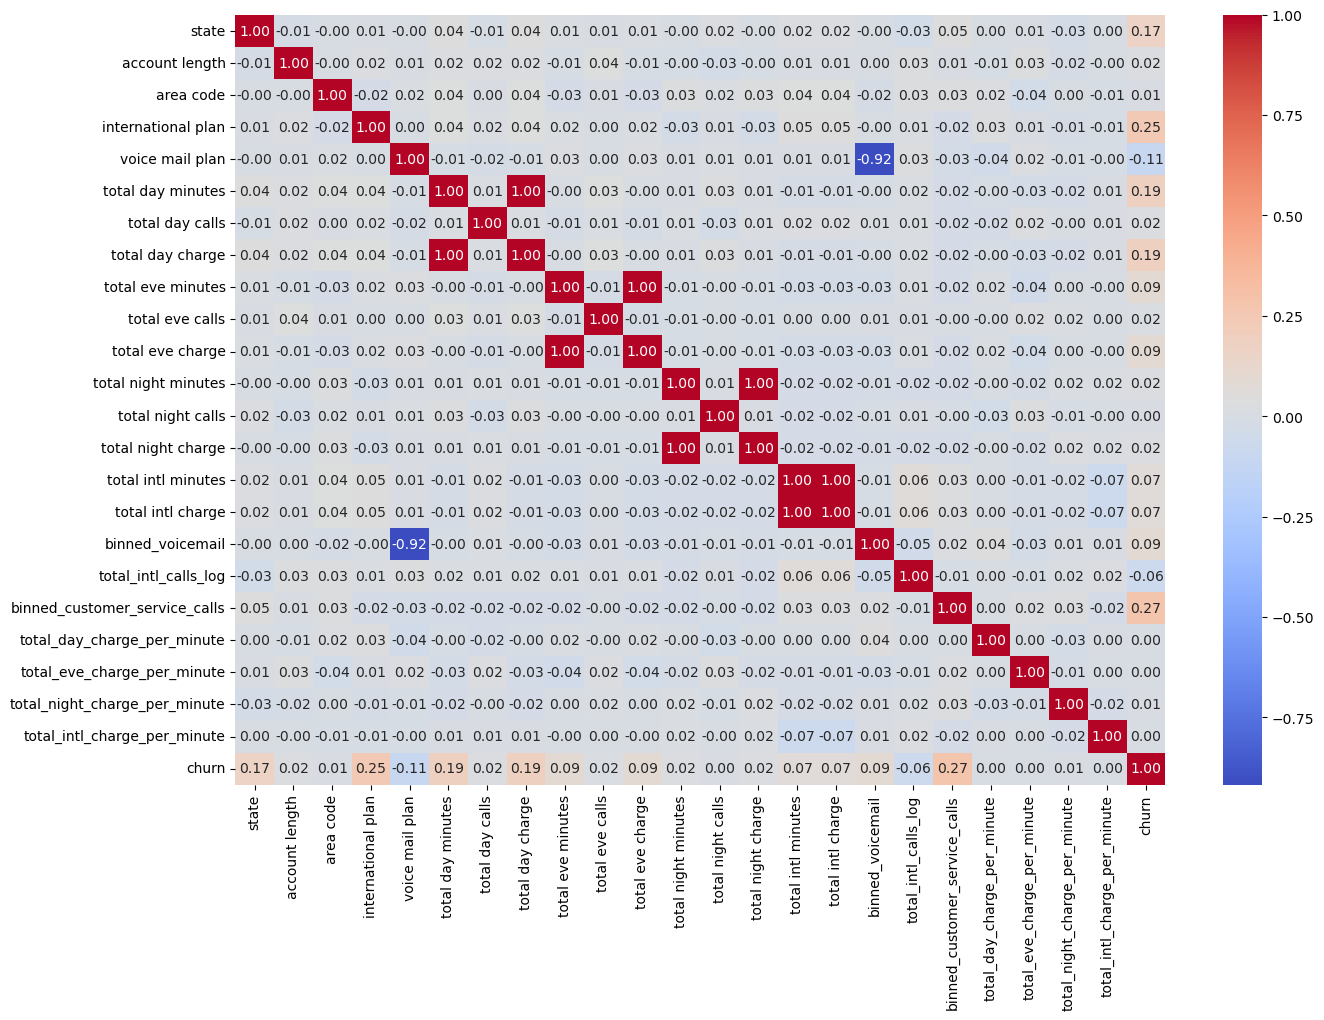

In [64]:
# SNS heatmap to check correlation again to remove highly correlated features

plt.figure(figsize=(15,10))
sns.heatmap(pd.concat([X_train,y_train], axis=1).corr(), annot = True, fmt = '.2f', cmap ='coolwarm')
plt.show()

From the heatmap, we can see that following features are highly correlated:

total day minutes & total day charge (100%)
total eve minutes & total eve charge (100%)
total night minutes & total night charge (100%)
total intl minutes & total intl charge (100%)
binned_voicemail & voice mail plan (93%)

Feature Importance from Models Tree-based Models:

Feature Importance from Models Tree-based Models: Use models like Random Forest, Gradient Boosting, 
or XGBoost that provide feature importance scores. Keep features with higher importance scores.

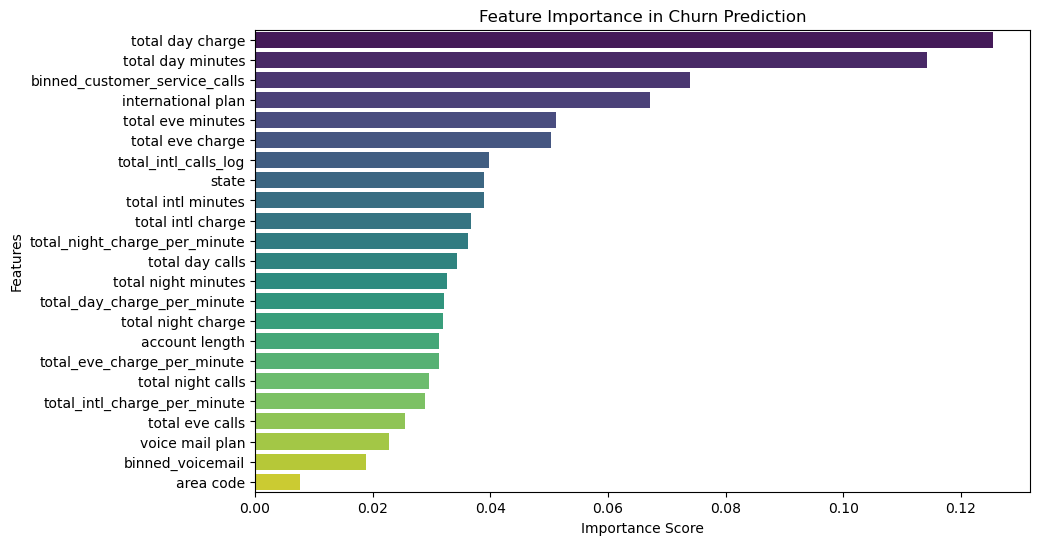

In [65]:
# Create and fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=500)
rf_model.fit(X_train, y_train)

# Get feature importance
importance = rf_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance in Churn Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
     


Redundancy Consideration Variability: Assess how much unique information each feature provides. If two features are very similar and one offers negligible additional information, 
    you might drop the one with lower variance.

In [66]:

variance = X_train.var()
variance.sort_values(ascending=False)
# check the variance to decide which features to drop.   

total_intl_calls_log             6.164898e-01
total intl charge                6.090785e-01
total intl minutes               6.065848e-01
account length                   5.658598e-01
total day charge                 5.583341e-01
total day minutes                5.577229e-01
total eve minutes                5.549527e-01
total eve charge                 5.536680e-01
total day calls                  5.493989e-01
total eve calls                  5.487704e-01
total night charge               5.432825e-01
total night minutes              5.429065e-01
total night calls                5.261214e-01
voice mail plan                  1.992554e-01
international plan               8.653266e-02
area code                        1.584247e-02
binned_customer_service_calls    9.359424e-03
state                            3.501826e-03
binned_voicemail                 1.065539e-03
total_intl_charge_per_minute     1.076756e-07
total_day_charge_per_minute      8.461337e-10
total_night_charge_per_minute    2

In [67]:
# drop minutes columns, binned_voicemail and all the 4 columns we created.

columns_to_drop = ['total intl minutes', 'total day minutes', 'total eve minutes',
                   'total night minutes', 'binned_voicemail', 'total_intl_charge_per_minute',
                   'total_day_charge_per_minute', 'total_night_charge_per_minute',
                   'total_eve_charge_per_minute']

X_train.drop(columns=columns_to_drop, inplace=True)
X_test.drop(columns=columns_to_drop, inplace=True)
X_train.head()

,state,account length,area code,international plan,voice mail plan,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl charge,total_intl_calls_log,binned_customer_service_calls
3286,0.152542,0.094340,0.501125,0,1,0.148148,0.561262,0.333333,0.311227,-0.148148,-0.626230,0.783505,1.050340,0.110636
86,0.160714,-0.132075,0.253563,0,0,0.148148,-0.294379,0.037037,-0.678804,-0.592593,-0.167213,-0.639175,0.325798,0.210417
1349,0.122449,-0.566038,0.245311,0,1,0.222222,-0.520825,0.185185,-0.560902,-0.037037,0.281967,-1.309278,-0.398744,0.110636
1649,0.127660,0.547170,0.253563,0,0,-0.555556,-1.524464,0.370370,-0.115301,1.444444,-0.432787,0.030928,0.000000,0.110636
3000,0.264151,-0.264151,0.245311,0,0,0.296296,0.603316,-0.518519,-1.084525,-0.629630,1.304918,1.175258,0.000000,0.210417


Balance the class

In [68]:
y_train.value_counts()

churn
0    2280
1     386
Name: count, dtype: int64

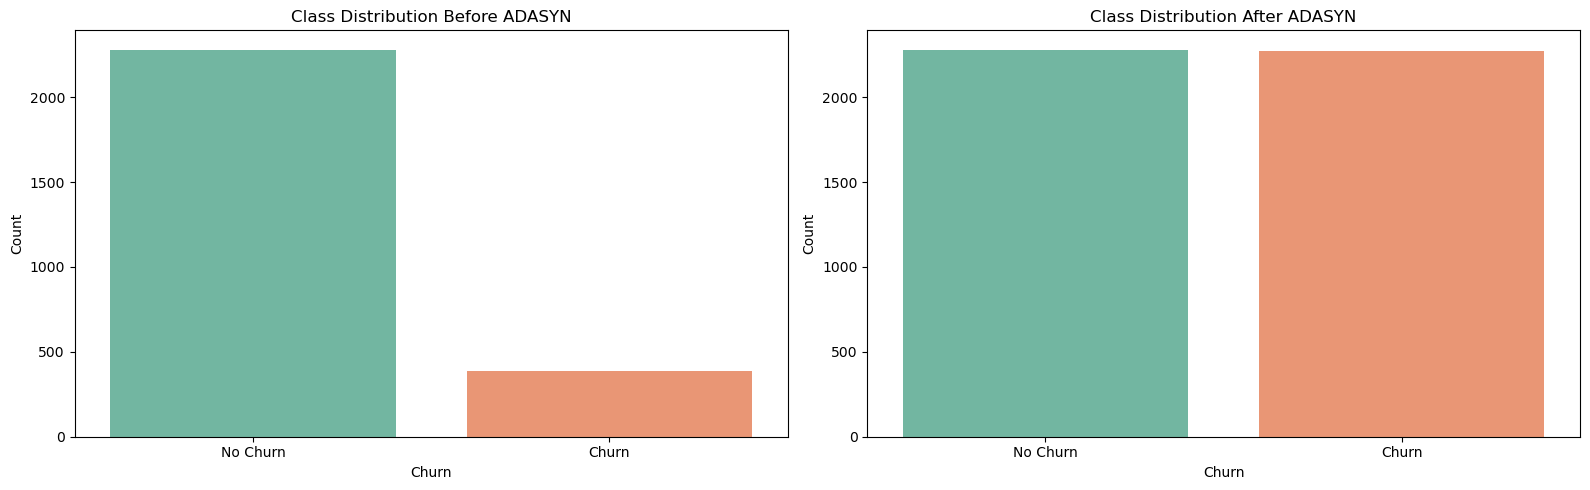

,Before,After
churn,,
0,2280,2280
1,386,2272


In [69]:
from imblearn.over_sampling import ADASYN

# Creating subplots for class distribution before and after ADASYN
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plotting class distribution before ADASYN
sns.countplot(x='churn', data=pd.concat([X_train, y_train], axis=1), palette='Set2', ax=axes[0])
axes[0].set_title('Class Distribution Before ADASYN')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Churn', 'Churn'])

# Applying ADASYN to balance the classes
adasyn = ADASYN(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Plotting class distribution after ADASYN
sns.countplot(x=y_resampled, palette='Set2', ax=axes[1])
axes[1].set_title('Class Distribution After ADASYN')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No Churn', 'Churn'])

plt.tight_layout()
plt.show()

# Creating a DataFrame to compare before and after
before_count = pd.Series(y_train).value_counts()
after_count = pd.Series(y_resampled).value_counts()

# Creating a DataFrame for better visualization
comparison_df = pd.DataFrame({
    'Before': before_count,
    'After': after_count
})

comparison_df

In [70]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, verbose=0),  # No verbosity
    'Random Forest': RandomForestClassifier(random_state=42, verbose=0),  # No verbosity
    'Support Vector Classifier': SVC(probability=True, verbose=False),  # No verbosity
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(verbose=0),  # No verbosity
    #'XGBoost': XGBClassifier(verbosity=0),  # No verbosity
    'LightGBM': LGBMClassifier(verbose=-1),  # No verbosity
    'Naive Bayes': GaussianNB()  # Naive Bayes classifier
}

print(models)

{'Logistic Regression': LogisticRegression(max_iter=1000), 'Random Forest': RandomForestClassifier(random_state=42), 'Support Vector Classifier': SVC(probability=True), 'Decision Tree': DecisionTreeClassifier(random_state=42), 'K-Nearest Neighbors': KNeighborsClassifier(), 'Gradient Boosting': GradientBoostingClassifier(), 'LightGBM': LGBMClassifier(verbose=-1), 'Naive Bayes': GaussianNB()}


In [71]:
# Set up 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a dictionary to store the evaluation metrics for each model
metrics_comparison = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'ROC AUC': []}

# Train models with 5-fold cross-validation on training data, and evaluate on test data
num_models = len(models)
for i, (model_name, model) in enumerate(models.items()):
    # Perform cross-validation on training data
    accuracy_cv = cross_val_score(model, X_resampled, y_resampled, cv=kf, scoring='accuracy').mean()
    precision_cv = cross_val_score(model, X_resampled, y_resampled, cv=kf, scoring='precision').mean()
    recall_cv = cross_val_score(model, X_resampled, y_resampled, cv=kf, scoring='recall').mean()
    f1_cv = cross_val_score(model, X_resampled, y_resampled, cv=kf, scoring='f1').mean()
    roc_auc_cv = cross_val_score(model, X_resampled, y_resampled, cv=kf, scoring='roc_auc').mean()

    # Train the model on the full resampled training set
    model.fit(X_resampled, y_resampled)

    # Predict on the test set
    y_pred_test = model.predict(X_test)
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]

    # Calculate test set evaluation metrics
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)

    # Append the results to the metrics_comparison dictionary
    metrics_comparison['Model'].append(model_name)
    metrics_comparison['Accuracy'].append(f"CV: {accuracy_cv:.4f} | Test: {accuracy_test:.4f}")
    metrics_comparison['Precision'].append(f"CV: {precision_cv:.4f} | Test: {precision_test:.4f}")
    metrics_comparison['Recall'].append(f"CV: {recall_cv:.4f} | Test: {recall_test:.4f}")
    metrics_comparison['F1 Score'].append(f"CV: {f1_cv:.4f} | Test: {f1_test:.4f}")
    metrics_comparison['ROC AUC'].append(f"CV: {roc_auc_cv:.4f} | Test: {roc_auc_test:.4f}")

    # Display percentage completion
    percent_complete = (i + 1) / num_models * 100
    print(f"Completed {percent_complete:.2f}% of evaluations.")

Completed 12.50% of evaluations.
Completed 25.00% of evaluations.
Completed 37.50% of evaluations.
Completed 50.00% of evaluations.
Completed 62.50% of evaluations.
Completed 75.00% of evaluations.
Completed 87.50% of evaluations.
Completed 100.00% of evaluations.


In [73]:
metrics_comparison = pd.DataFrame(metrics_comparison)
metrics_comparison

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,CV: 0.7695 | Test: 0.7526,CV: 0.7795 | Test: 0.3411,CV: 0.7504 | Test: 0.7526,CV: 0.7646 | Test: 0.4695,CV: 0.8369 | Test: 0.8239
1,Random Forest,CV: 0.9545 | Test: 0.9040,CV: 0.9616 | Test: 0.7089,CV: 0.9467 | Test: 0.5773,CV: 0.9541 | Test: 0.6364,CV: 0.9876 | Test: 0.8728
2,Support Vector Classifier,CV: 0.8858 | Test: 0.8471,CV: 0.9050 | Test: 0.4793,CV: 0.8618 | Test: 0.5979,CV: 0.8826 | Test: 0.5321,CV: 0.9539 | Test: 0.8371
3,Decision Tree,CV: 0.8996 | Test: 0.8576,CV: 0.8856 | Test: 0.5088,CV: 0.9177 | Test: 0.5979,CV: 0.9013 | Test: 0.5498,CV: 0.8996 | Test: 0.7498
4,K-Nearest Neighbors,CV: 0.8469 | Test: 0.7376,CV: 0.7669 | Test: 0.3050,CV: 0.9960 | Test: 0.6289,CV: 0.8666 | Test: 0.4108,CV: 0.9590 | Test: 0.7437
5,Gradient Boosting,CV: 0.9396 | Test: 0.9025,CV: 0.9608 | Test: 0.6702,CV: 0.9159 | Test: 0.6495,CV: 0.9378 | Test: 0.6597,CV: 0.9756 | Test: 0.8596
6,LightGBM,CV: 0.9574 | Test: 0.9325,CV: 0.9727 | Test: 0.8023,CV: 0.9410 | Test: 0.7113,CV: 0.9566 | Test: 0.7541,CV: 0.9869 | Test: 0.8776
7,Naive Bayes,CV: 0.7715 | Test: 0.8351,CV: 0.8598 | Test: 0.4496,CV: 0.6488 | Test: 0.5979,CV: 0.7388 | Test: 0.5133,CV: 0.8449 | Test: 0.7970


In [74]:
best_model_name = 'LightGBM'
best_model = models[best_model_name]

# Predict on the test set
y_pred_test = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate accuracy, precision, recall, F1 score, and ROC AUC
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.9325337331334332
Precision: 0.8023255813953488
Recall: 0.711340206185567
F1 Score: 0.7540983606557377
ROC AUC: 0.8776451437873033


True Negatives: 553, False Positives: 17, False Negatives: 28, True Positives: 69


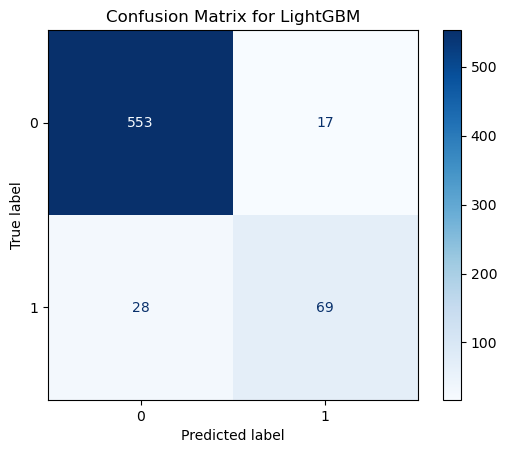

In [75]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Optionally, print additional metrics for clarity
tn, fp, fn, tp = cm.ravel()
print(f'True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}')

# Display the confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
cmd.plot(cmap='Blues')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()
     

Hyperparameter Tuning

In [76]:
# Define the expanded parameter grid for RandomizedSearchCV

param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3], #default parameter
    'n_estimators': [50, 100, 200, 500, 1000],
    'num_leaves': [20, 30, 40, 50, 100]
   
}

In [77]:
# Initialize the LightGBM model
lgb_model = LGBMClassifier(verbose=-1)

# Perform RandomizedSearchCV for hyperparameter tuning with the expanded parameter distribution
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist,
    n_iter=10,  # You can adjust the number of iterations
    cv=5,
    scoring='f1',
    verbose=1,
    n_jobs=-1,
    random_state=42  # Set random_state for reproducibility
)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters found: {best_params}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'num_leaves': 40, 'n_estimators': 500, 'learning_rate': 0.05}


In [78]:
# Train the best model with the optimal parameters
best_lgb_model = random_search.best_estimator_
best_lgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_lgb_model.predict(X_test)
y_pred_proba = best_lgb_model.predict_proba(X_test)[:, 1]

# Calculate accuracy, precision, recall, F1 score, and ROC AUC
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.9385307346326837
Precision: 0.8783783783783784
Recall: 0.6701030927835051
F1 Score: 0.7602339181286549
ROC AUC: 0.9010309278350516


In [79]:
# Optionally, print additional metrics for clarity
tn, fp, fn, tp = cm.ravel()
print(f'True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}')

True Negatives: 553, False Positives: 17, False Negatives: 28, True Positives: 69


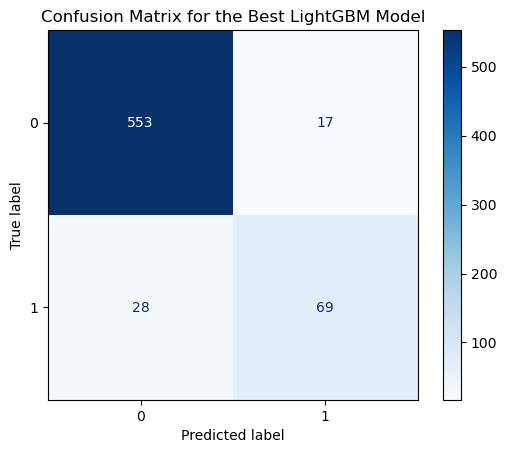

In [80]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for the Best LightGBM Model')
plt.show()

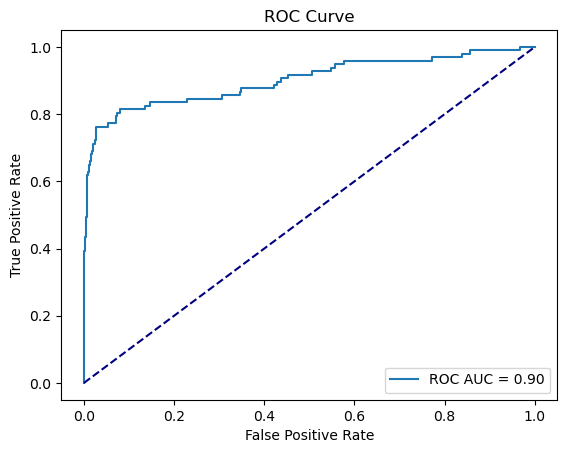

In [81]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [82]:
# save best model


joblib.dump(best_lgb_model, 'best_lgb_model.pkl')

['best_lgb_model.pkl']

Developing ML pipeline

Correct data type of "area code" column.

Drop "phone number" column.

Binning the "number vmail messages" column into 2 bins: Low for 0-20, High for 20+.

Apply log transformation on "total intl calls" using np.log1p

Binning the "customer service calls" column into 3 bins: Low for 0-2, Medium for 3-4, High for 4+

Direct Mapping "international plan" and "voice mail plan" columns: 0 for 'no', 1 for 'yes'.

Frequency Encoding "area code" using freq_encoding_area_code.

Target Encoding "state", "binned voicemail" and "binner customer service calls" using target_encoding_state, 
target_encoding_binned_voicemail and target_encoding_binned_csc respectively.

Use Robust Scaler on remaining columns.

Drop columns which are not important: columns_to_drop

Use best_lgb_model to make prediction.

In [83]:
encoding_state = target_encoding_state.to_dict()['churn_rate']
encoding_area_code = freq_encoding_area_code.to_dict()
encoding_binned_csc = target_encoding_binned_csc.to_dict()['churn_rate']

def encode(X):

  # Map 'international plan' and 'voice mail plan'
    X['international plan'] = X['international plan'].map({'no': 0, 'yes': 1})
    X['voice mail plan'] = X['voice mail plan'].map({'no': 0, 'yes': 1})

    # Target encoding for 'state'
    X['state'] = X['state'].map(encoding_state)

    # Frequency encoding for 'area code'
    X['area code'] = X['area code'].map(encoding_area_code)

    X['binned_customer_service_calls'] = pd.cut(X['customer service calls'], bins=[-1, 3, 5, np.inf], labels=['Low', 'Medium', 'High'])
    X['binned_customer_service_calls'] = X['binned_customer_service_calls'].map(encoding_binned_csc)

    return X

def log_transform(X):
    # Apply log transformation to 'total intl calls'
    X['total_intl_calls_log'] = np.log1p(X['total intl calls'])

    return X

columns_to_drop = ['phone number', 'number vmail messages', 'total day minutes',
                    'total eve minutes', 'total night minutes', 'total intl minutes',
                   'customer service calls', 'total intl calls']

columns_to_scale = ['account length', 'total day calls', 'total day charge',
                    'total eve calls', 'total eve charge','total night calls',
                      'total night charge','total intl charge']

# Create the preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[
    ('encode', FunctionTransformer(encode)),
    ('log_transform', FunctionTransformer(log_transform)),
    ('drop_columns', FunctionTransformer(lambda df: df.drop(columns=columns_to_drop, errors='ignore'))),
    ('scaling', ColumnTransformer([
        ('scale', RobustScaler(), columns_to_scale)
    ], remainder='passthrough'))
])

X = df_copy.drop(columns=['churn'])  # Drop the target column from the feature set
y = df_copy['churn']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

train_data = X_train.copy()

# Fit the pipeline on training data
preprocessing_pipeline.fit(train_data)

Pipeline(steps=[('encode',
                 FunctionTransformer(func=<function encode at 0x000002DF86EAF7E0>)),
                ('log_transform',
                 FunctionTransformer(func=<function log_transform at 0x000002DF86D460C0>)),
                ('drop_columns',
                 FunctionTransformer(func=<function <lambda> at 0x000002DF86D46340>)),
                ('scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', RobustScaler(),
                                                  ['account length',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night calls',
                                                   'total night charge',
                                                   'total intl charge'])]))])

In [84]:
# Load the trained best LightGBM model
best_lgb_model = joblib.load('best_lgb_model.pkl')  # Load the model (replace with correct path)

def predict_churn(new_data):
    """
    Predict whether a new customer will churn based on their feature values.

    Args:
    - new_data (pd.DataFrame): The new customer data

    Returns:
    - prediction (int): 1 if the customer is predicted to churn, 0 otherwise
    """
    # # Transform the new customer data
    transformed_data = preprocessing_pipeline.transform(new_data)

    column_order = ['account length', 'total day calls', 'total day charge',
                    'total eve calls', 'total eve charge','total night calls',
                    'total night charge', 'total intl charge', 'state',
                    'area code','international plan', 'voice mail plan',
        'binned_customer_service_calls', 'total_intl_calls_log']

    # Create DataFrame for transformed data and reindex according to the specified column order
    transformed_df = pd.DataFrame(transformed_data, columns=column_order)
    common_columns = new_data.columns.intersection(transformed_df.columns)
    transformed_df = transformed_df[common_columns]
    # print(transformed_df)

    preprocessed_data = transformed_df

    # Use the LightGBM model to predict churn
    prediction = best_lgb_model.predict(preprocessed_data)

    return prediction

Make Prediction on new data

In [85]:
examples = pd.DataFrame({
    'state': ['CA', 'NY', 'TX', 'CA', 'FL', 'NJ', 'IL', 'MI', 'VA', 'WA'],
    'phone number': ['352-2270', '123-4567', '234-5678', '345-6789', '456-7890', '567-8901', '678-9012', '789-0123', '890-1234', '901-2345'],
    'account length': [106, 200, 150, 80, 120, 210, 175, 190, 110, 135],
    'area code': [415, 408, 510, 415, 415, 408, 510, 510, 415, 408],
    'number vmail messages': [30, 0, 15, 25, 5, 10, 0, 35, 0, 20],
    'total day minutes': [220.1, 150.5, 300.2, 180.3, 250.7, 100.8, 275.9, 190.0, 210.4, 280.2],
    'total day calls': [105, 110, 95, 130, 120, 100, 85, 115, 105, 99],
    'total day charge': [37.42, 25.58, 51.03, 30.67, 42.62, 17.13, 46.90, 32.30, 35.77, 47.63],
    'total eve minutes': [222.2, 300.5, 150.3, 250.9, 190.6, 230.4, 200.2, 180.1, 215.9, 240.0],
    'total eve calls': [109, 85, 110, 90, 100, 105, 120, 99, 95, 110],
    'total eve charge': [18.89, 25.54, 12.78, 21.33, 16.20, 19.58, 17.02, 15.31, 18.35, 20.40],
    'total night minutes': [158.4, 200.3, 100.5, 150.7, 190.1, 130.2, 170.4, 210.5, 160.2, 180.0],
    'total night calls': [96, 100, 90, 110, 105, 120, 115, 89, 100, 95],
    'total night charge': [7.13, 9.01, 4.52, 6.78, 8.56, 5.86, 7.67, 9.47, 7.21, 8.10],
    'total intl minutes': [13.1, 12.0, 15.3, 10.5, 9.8, 14.6, 13.5, 8.9, 11.0, 12.4],
    'total intl calls': [8, 6, 5, 7, 4, 9, 10, 5, 6, 8],
    'total intl charge': [3.54, 3.24, 4.13, 2.84, 2.65, 3.94, 3.65, 2.40, 2.97, 3.35],
    'customer service calls': [0, 1, 2, 3, 2, 4, 0, 8, 1, 3],
    'international plan': ['no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no'],
    'voice mail plan': ['yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes']
})
     

In [86]:
predictions = predict_churn(examples)

# Iterate through each prediction and print the result
for i, prediction in enumerate(predictions):
    if prediction == 1:
        print(f"Customer {i+1} is predicted to churn.")
    else:
        print(f"Customer {i+1} is predicted to not churn.")
     

Customer 1 is predicted to churn.
Customer 2 is predicted to churn.
Customer 3 is predicted to churn.
Customer 4 is predicted to churn.
Customer 5 is predicted to not churn.
Customer 6 is predicted to churn.
Customer 7 is predicted to not churn.
Customer 8 is predicted to churn.
Customer 9 is predicted to not churn.
Customer 10 is predicted to not churn.
